In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
from matplotlib import colormaps as cm
import os
import glob
import gaitFunctions
from gaitFunctions import swingTimingProportions
from scipy import stats
import seaborn as sns

def meanstdstr(vals):
    return str(np.round(np.mean(vals),2)) + ' ± ' + str(np.round(np.std(vals),2))

In [2]:
# plot colors and parameters
axis_fontsize=11
tick_fontsize=9

# colors for step kinematics
stance_color = '#5656ff'
swing_color = '#e1e813'
duty_color = '#4d4d4d'
ipsi_color = 'tab:red'
contra_color = 'tab:green'
mcl_color = 'tab:orange'

# colors for legs
first_pair_color = '#bc272d' # red
first_pair_color_alt = '#f77276' # salmon
second_pair_color = '#50a9d4' # teal
second_pair_color_alt = '#95dafc' # sky blue
third_pair_color = '#fa9805' # orange
third_pair_color_alt = '#e9c716' # gold
rear_leg_color = '#a665c9'# violet
rear_leg_color_alt = '#0000a2' # indigo

# scatter marker size and alpha
marker_size = 10
marker_alpha = 0.4
marker_color = 'k'

In [3]:
# navigate to directory that contains the data
os.chdir('/Users/iwoods/OneDrive - Ithaca College/2024_tardiGait_paper/analyses_summaries')
xl_files = sorted(glob.glob('*.xlsx'))
# excel_file = gaitFunctions.selectOneFromList(xl_files) # to select!
excel_file = 'all_exemplaris_2024-04-03.xlsx'

# load the step_timing data into a dataframe
step_df = pd.read_excel(excel_file, sheet_name='step_timing', index_col=None)
step_df.head(3)

,legID,DownTime,UpTime,stance,swing,gait,duty,midSwingTime,L1_mid_swings,R1_mid_swings,...,anterior_offsets,contralateral_offsets,metachronal_lag,mcl_LR_ratio,L3_bearing_change,clip,treatment,individual,date,uniq_id
0,L1,0.272,1.151,0.879,0.242,1.121,0.7841,1.2720,L1:0.8921,R1:,...,NaN,0.667,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris
1,L1,1.393,2.606,1.213,0.303,1.516,0.8001,2.7575,L1:0.9001,R1:0.3701,...,NaN,1.030,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris
2,L1,2.909,4.090,1.181,0.334,1.515,0.7795,4.2570,L1:0.8898,R1:0.5597,...,NaN,0.879,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris


# leg relationships and colors

In [4]:
first_pair = ['L1','R1']
second_pair = ['L2','R2']
third_pair = ['L3','R3']
fourth_pair = ['L4','R4']
rear_legs = fourth_pair
lateral_legs = third_pair + second_pair + first_pair
ipsi_offset_legs = third_pair + second_pair
left_laterals = [x[0] for x in [third_pair, second_pair, first_pair]]
right_laterals = [x[1] for x in [third_pair, second_pair, first_pair]]
all_legs = rear_legs + lateral_legs
left_legs = [x[0] for x in [fourth_pair, third_pair, second_pair, first_pair]]
right_legs = [x[1] for x in [fourth_pair, third_pair, second_pair, first_pair]]
single_leg = ['R4']

# dictionaries of inter-leg relationships
ipsi_legs = {'L4':'L3','R4':'R3','L3':'L2','L2':'L1','R3':'R2','R2':'R1'}
contra_legs = {'L4':'R4','R4':'L4','L3':'R3','L2':'R2','R3':'L3','R2':'L2','L1':'R1','R1':'L1'}

# colors
all_leg_color = 'dimgrey'
L2_L1_color =   second_pair_color
L3_L2_color =   third_pair_color
R2_R1_color =   second_pair_color_alt
R3_R2_color =   third_pair_color_alt

# Suppression of simultaneous swings

All Legs - ipsilateral offsets: 5175 steps
All Legs - contralateral offsets: 3809 steps
-- ipsilateral -- 
L2 : 1301 steps
L3 : 1279 steps
R2 : 1317 steps
R3 : 1278 steps
-- contralateral -- 
L3 : 1253 steps
L2 : 1251 steps
L1 : 1305 steps
L4 : 1530 steps
R4 : 1532 steps
All legs - ipsilateral stance-swing offsets:  4571 steps
All legs - contralateral stance-swing offsets:  3548 steps
L2 : 1145 steps
L3 : 1145 steps
R2 : 1154 steps
R3 : 1127 steps
L3 : 1161 steps
L2 : 1184 steps
L1 : 1203 steps


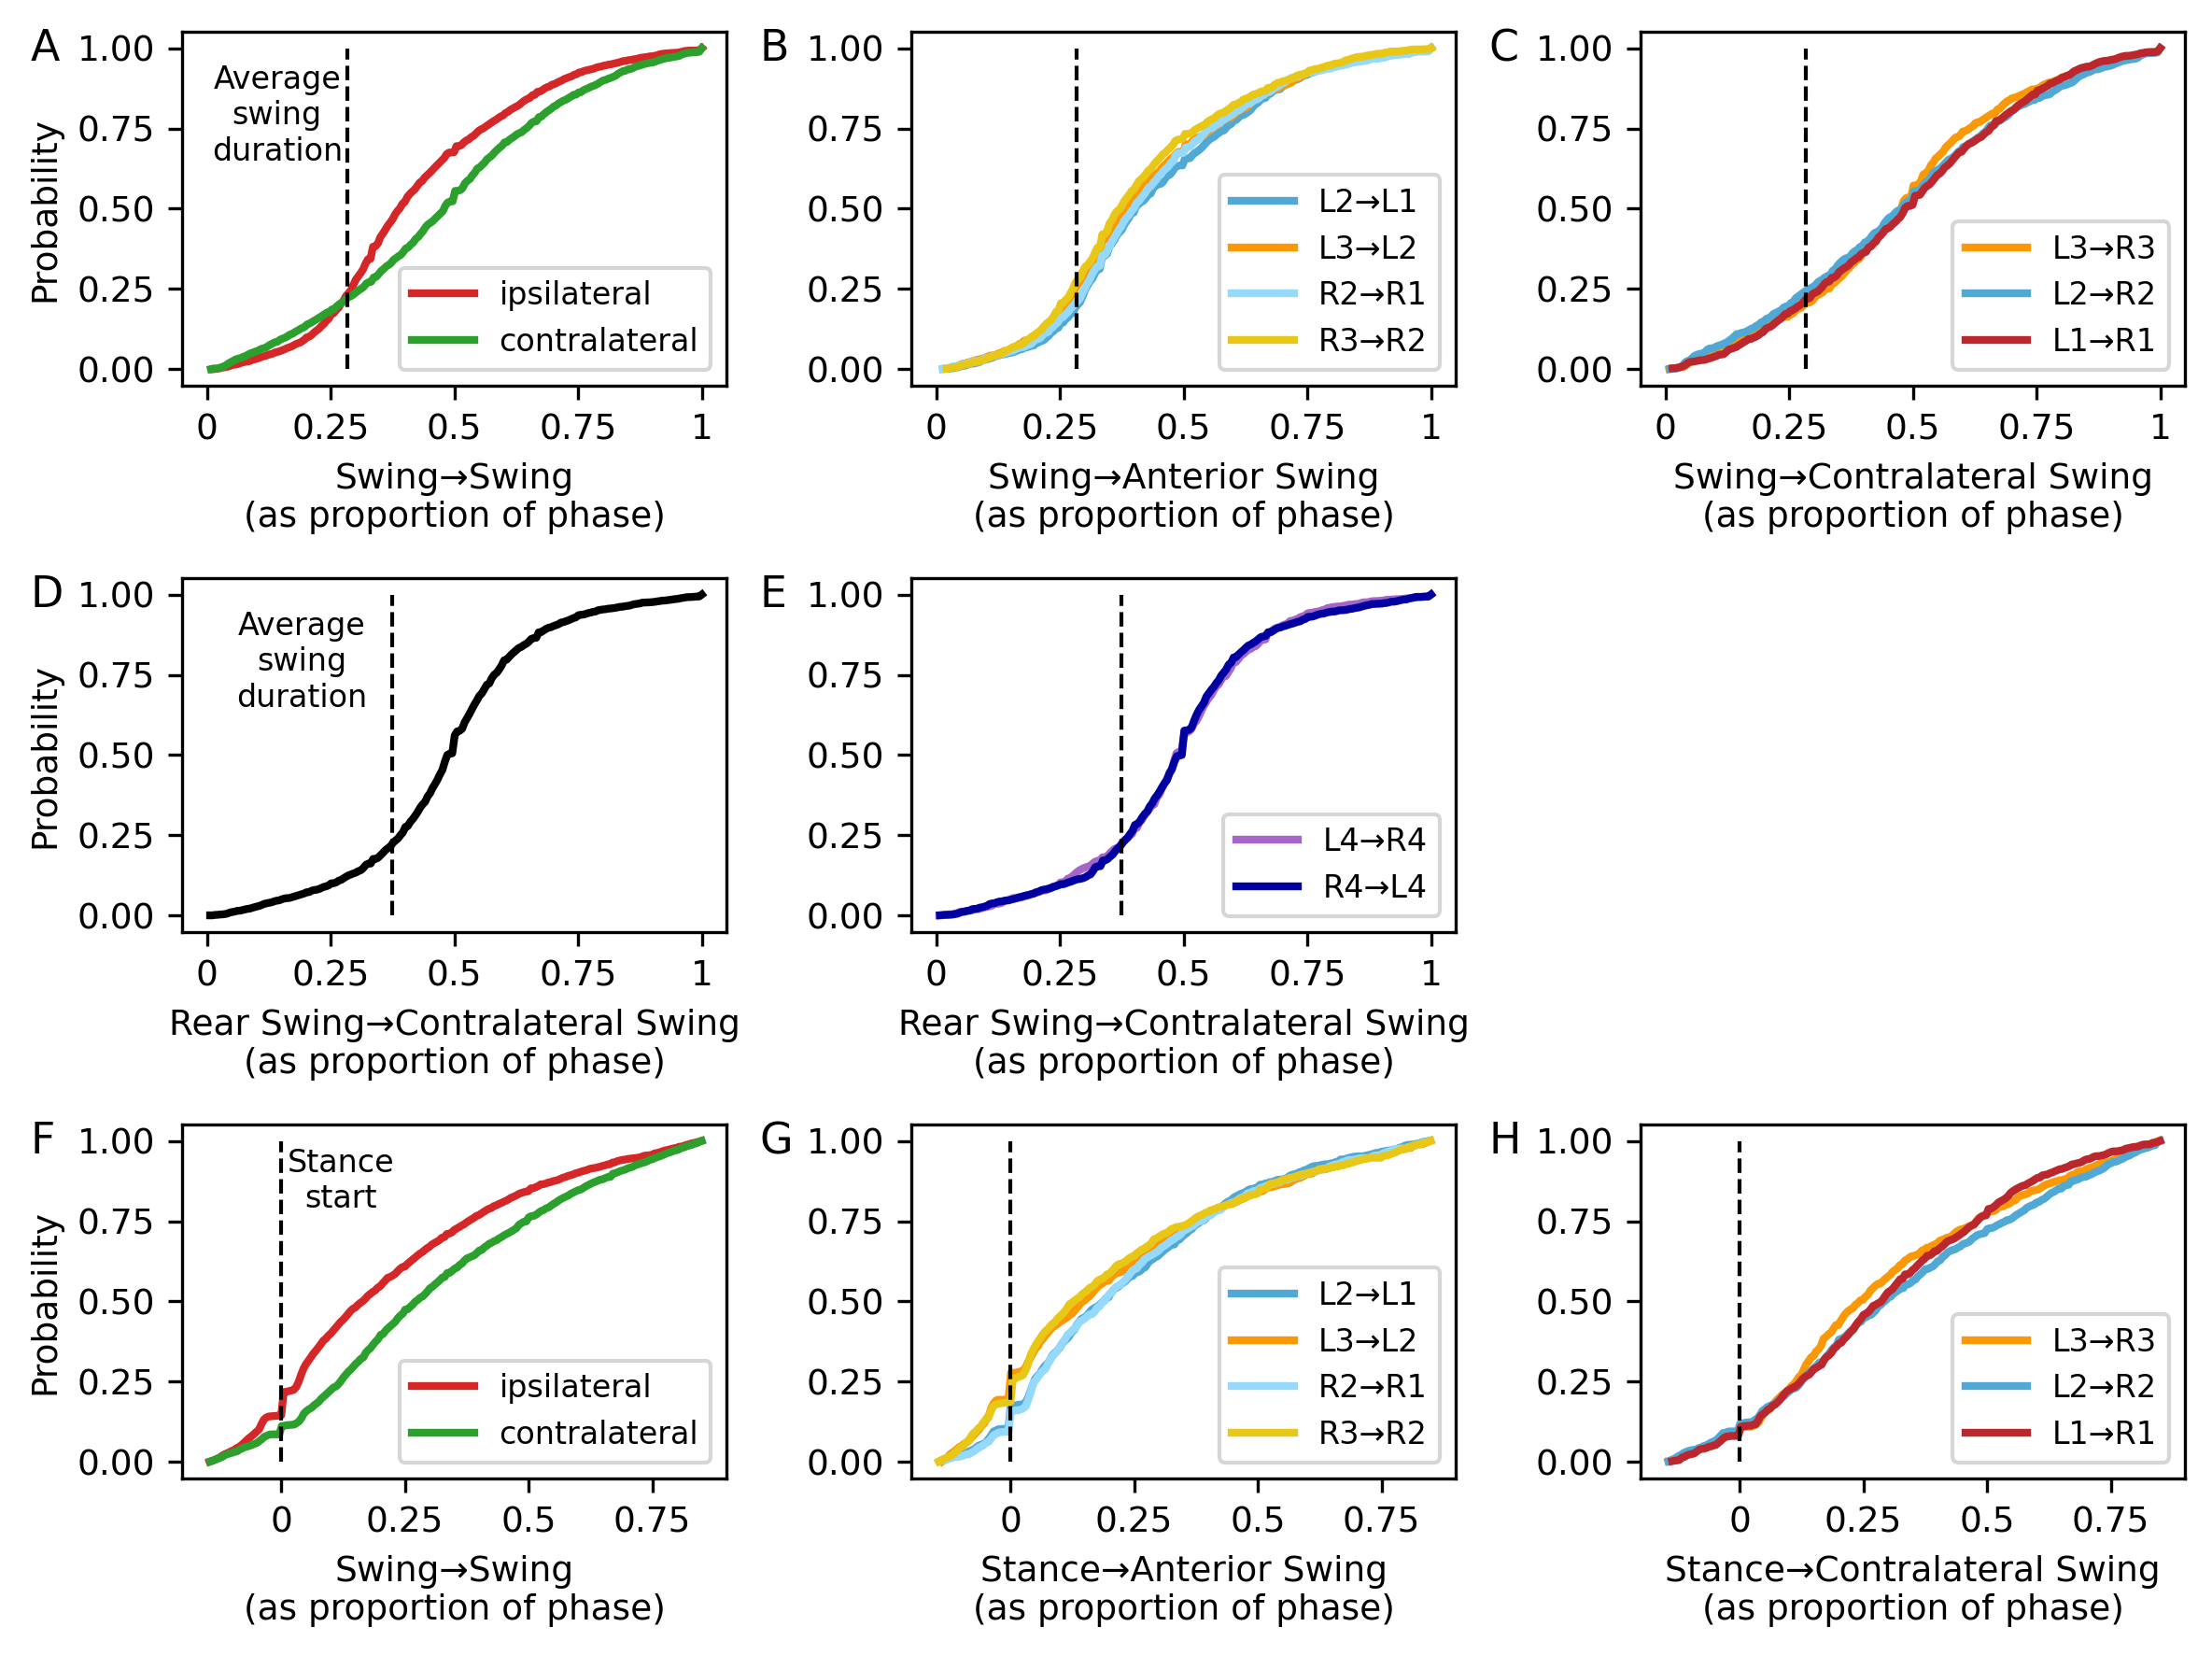

In [5]:
fig,[[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]] = plt.subplots(3,3,figsize=(8,6), dpi=300)

### TOP LEFT AXIS
## all legs ... ipsilateral offsets
proportions = []
speeds = []
offsets = []
for leg in ipsi_offset_legs:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, ipsi_legs[leg])

ipsi_swing_averages = np.mean(step_df[step_df.legID.isin(ipsi_offset_legs)].swing.values)
ipsi_period_averages = np.mean(step_df[step_df.legID.isin(ipsi_offset_legs)].gait.values)
normalized_ipsi_swing_averages = ipsi_swing_averages / ipsi_period_averages
    
# ----> plot cumulative probability
H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax1.plot(X1[1:], F1, linewidth=2, color = ipsi_color, label='ipsilateral')
print('All Legs - ipsilateral offsets:', len(proportions), 'steps')


## all legs ... contralateral offsets
proportions = []
speeds = []
offsets = []
for leg in left_laterals:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, contra_legs[leg])

# ----> plot cumulative probability
H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax1.plot(X1[1:], F1, linewidth=2, color = contra_color, label='contralateral')
print('All Legs - contralateral offsets:', len(proportions), 'steps')
    
# labels and legend for LEFT axis
ax1.legend(fontsize=tick_fontsize-1)
ax1.set_xlabel('Swing→Swing\n(as proportion of phase)',fontsize=tick_fontsize)
ax1.set_ylabel('Probability',fontsize=tick_fontsize)
ax1.text(ipsi_swing_averages-0.13, 0.95,'Average\nswing\nduration', fontsize=tick_fontsize-1, 
         horizontalalignment='center', verticalalignment='top')
ax1.annotate('A', xy=(-0.28, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

### MIDDLE AXIS
## Individual Legs --> ipsilateral offsets ... 
print('-- ipsilateral -- ')
leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]
ypos = 1
swing_averages = np.mean(step_df[step_df.legID.isin(ipsi_offset_legs)].swing.values)
for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, comp[0], comp[1])
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax2.plot(X1[1:], F1, linewidth=2, color = plot_cols[i], label='→'.join(comp))
    print(comp[0], ':', len(proportions), 'steps')
ax2.legend(fontsize=tick_fontsize-1)
ax2.set_xlabel('Swing→Anterior Swing\n(as proportion of phase)',fontsize=tick_fontsize)

### RIGHT AXIS
## Individual Legs --> contralateral offsets ... 
print('-- contralateral -- ')
leg_comps = [['L3','R3'],['L2','R2'],['L1','R1']]
plot_cols = [third_pair_color,second_pair_color,first_pair_color]

for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, comp[0], comp[1])
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax3.plot(X1[1:], F1, linewidth=2, color = plot_cols[i], label='→'.join(comp))
    print(comp[0], ':', len(proportions), 'steps')
ax3.legend(fontsize=tick_fontsize-1)
ax3.set_xlabel('Swing→Contralateral Swing\n(as proportion of phase)',fontsize=tick_fontsize)

for ax in [ax1,ax2,ax3]:
    ax.plot([normalized_ipsi_swing_averages,normalized_ipsi_swing_averages],[0,1],'--k', linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

    
### MIDDLE ROW! REAR CONTRALATERAL
proportions = []
speeds = []
offsets = []
contra_rear = {'L4':'R4','R4':'L4'}
for leg in ['L4','R4']:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, leg, 
                                                          contra_rear[leg])

rear_swing_averages = np.mean(step_df[step_df.legID.isin(['L4','R4'])].swing.values)

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax4.plot(X1[1:], F1, linewidth=2, color = 'k', label='rear legs')

# seaborn kernel density estimation
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars

leg_comps = [['L4','R4'],['R4','L4']]
plot_cols = [rear_leg_color,rear_leg_color_alt]

for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, comp[0], comp[1])
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax5.plot(X1[1:], F1, linewidth=2, color = plot_cols[i], label='→'.join(comp))
    print(comp[0], ':', len(proportions), 'steps')

ax4.set_ylabel('Probability',fontsize=tick_fontsize)
ax4.text(ipsi_swing_averages-0.08, 0.95,'Average\nswing\nduration', fontsize=tick_fontsize-1, 
         horizontalalignment='center', verticalalignment='top')
ax4.annotate('D', xy=(-0.28, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)
ax5.legend(fontsize=tick_fontsize-1)
for ax in [ax4,ax5]:
    ax.plot([rear_swing_averages,rear_swing_averages],[0,1],'--k', linewidth=1)
    ax.set_xlabel('Rear Swing→Contralateral Swing\n(as proportion of phase)',fontsize=tick_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
ax6.set_axis_off()


### BOTTOM ROW!! STANCES ... ipsilateral
proportions = []
speeds = []
offsets = []
for leg in ipsi_offset_legs:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, ipsi_legs[leg], 'stanceswing')

# ==========> offset x axis to just before stance start <==========
threshold = 0.85
proportions = [x if x<=threshold else x-1 for x in proportions]

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax7.plot(X1[1:], F1, linewidth=2, color = ipsi_color, label='ipsilateral')
print('All legs - ipsilateral stance-swing offsets: ', len(proportions), 'steps')

# ... contralateral
proportions = []
speeds = []
offsets = []
for leg in left_laterals:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, contra_legs[leg], 'stanceswing')

# ==========> offset x axis to just before stance start <==========
threshold = 0.85
proportions = [x if x<=threshold else x-1 for x in proportions]    

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax7.plot(X1[1:], F1, linewidth=2, color = contra_color, label='contralateral')
print('All legs - contralateral stance-swing offsets: ', len(proportions), 'steps')

ax7.set_ylabel('Probability', fontsize=tick_fontsize)
ax7.set_xlabel('Swing→Swing\n(as proportion of phase)',fontsize=tick_fontsize)
ax7.legend(fontsize=tick_fontsize-1)
ax7.annotate('F', xy=(-0.28, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)
ax7.text(0.12, 0.98,'Stance\nstart', fontsize=tick_fontsize-1, 
         horizontalalignment='center', verticalalignment='top')


### MIDDLE Individual legs --> ipsilateral offsets
leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]
for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, 
                                                          comp[0], comp[1], 'stanceswing')
    
    proportions = [x if x<=threshold else x-1 for x in proportions]
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax8.plot(X1[1:], F1, linewidth=2, color = plot_cols[i], label='→'.join(comp))
    print(comp[0], ':', len(proportions), 'steps')
ax8.legend(fontsize=tick_fontsize-1)
ax8.set_xlabel('Stance→Anterior Swing\n(as proportion of phase)',fontsize=tick_fontsize)

### RIGHT Individual legs --> contralateral offsets
leg_comps = [['L3','R3'],['L2','R2'],['L1','R1']]
plot_cols = [third_pair_color, second_pair_color, first_pair_color]
for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, 
                                                          comp[0], comp[1], 'stanceswing')
    
    proportions = [x if x<=threshold else x-1 for x in proportions]
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax9.plot(X1[1:], F1, linewidth=2, color = plot_cols[i], label='→'.join(comp))
    print(comp[0], ':', len(proportions), 'steps')
ax9.legend(fontsize=tick_fontsize-1)
ax9.set_xlabel('Stance→Contralateral Swing\n(as proportion of phase)',fontsize=tick_fontsize)

for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.set_xlim([-0.05,1.05])
    ax.set_ylim([-0.05,1.05])
    ax.set_xticks([0,1/4,1/2,3/4,1],[str(x) for x in [0,0.25,0.5,0.75,1]])
    
for ax in [ax7,ax8,ax9]:
    ax.set_xlim([-(1-threshold)-0.05,threshold+0.05])
    ax.set_ylim([-0.05,1.05])
    ax.plot([0,0],[0,1],'--k', linewidth=1)
    ax.set_xticks([0,1/4,1/2,3/4],[str(x) for x in [0,0.25,0.5,0.75]])
    ax.set_yticks([0,1/4,1/2,3/4,1],['0.00','0.25','0.50','0.75','1.00'])
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
letters = ['B','C','E','G','H']
for i,ax in enumerate([ax2,ax3,ax5,ax8,ax9]):
#     ax.set_yticks([])
    ax.annotate(letters[i], xy=(-0.28, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

plt.tight_layout()
plt.show()

# Initiation of anterior swing at touch-down
### Nirody Figure 4B 

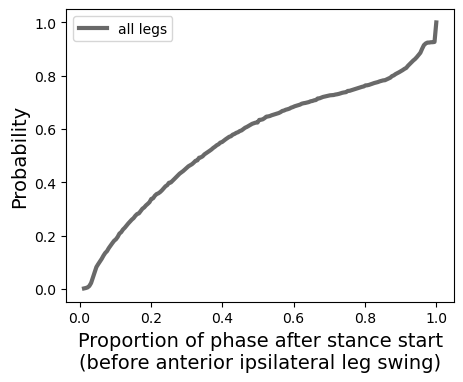

In [6]:
proportions = []
speeds = []
offsets = []
for leg in ipsi_offset_legs:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, ipsi_legs[leg], 'stanceswing')

fig,ax = plt.subplots(1,1,figsize=(5,3.8))

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True, kde=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
plt.xlabel('Proportion of phase after stance start\n(before anterior ipsilateral leg swing)',fontsize=14)
ax.yaxis.label.set_size(14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)   
ax.legend()
plt.show()

## Initiation of anterior swing at touch-down: Individual Legs
### Nirody Figure 4B Inset

L2 : 1145 steps
L3 : 1145 steps
R2 : 1154 steps
R3 : 1127 steps


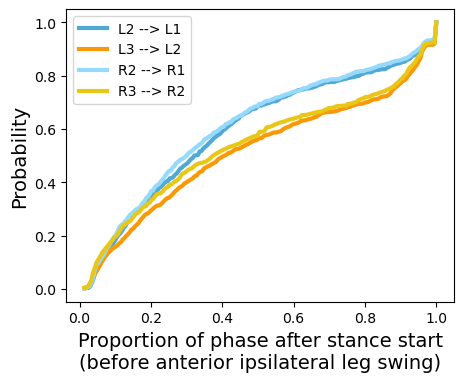

In [7]:
f,ax = plt.subplots(1,1,figsize=(5,3.8))
leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]
ypos = 1

for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, 
                                                          comp[0], comp[1], 'stanceswing')
  
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))

#     ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                       stat='probability',line_kws={'linewidth':3}, legend=True,
#                       color=plot_cols[i], edgecolor='w', visible=False) # can set to false to hide bars
    
#     # klugey legend
#     plt.plot([0,0.08],[ypos,ypos],color=plot_cols[i],linewidth=3)
#     plt.text(0.1,ypos-0.01, ' --> '.join(comp),fontsize=12)
#     ypos -= 0.06
    
    print(comp[0], ':', len(proportions), 'steps')
ax.legend()
plt.xlabel('Proportion of phase after stance start\n(before anterior ipsilateral leg swing)',fontsize=14)
ax.set_ylabel('Probability',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)   
plt.show()

## Initiation of anterior swing at touch-down
### Nirody Figure 4B ... but adjust x-axis to start just BEFORE stance

All Legs: 4571 steps
L2 : 1145 steps
L3 : 1145 steps
R2 : 1154 steps
R3 : 1127 steps


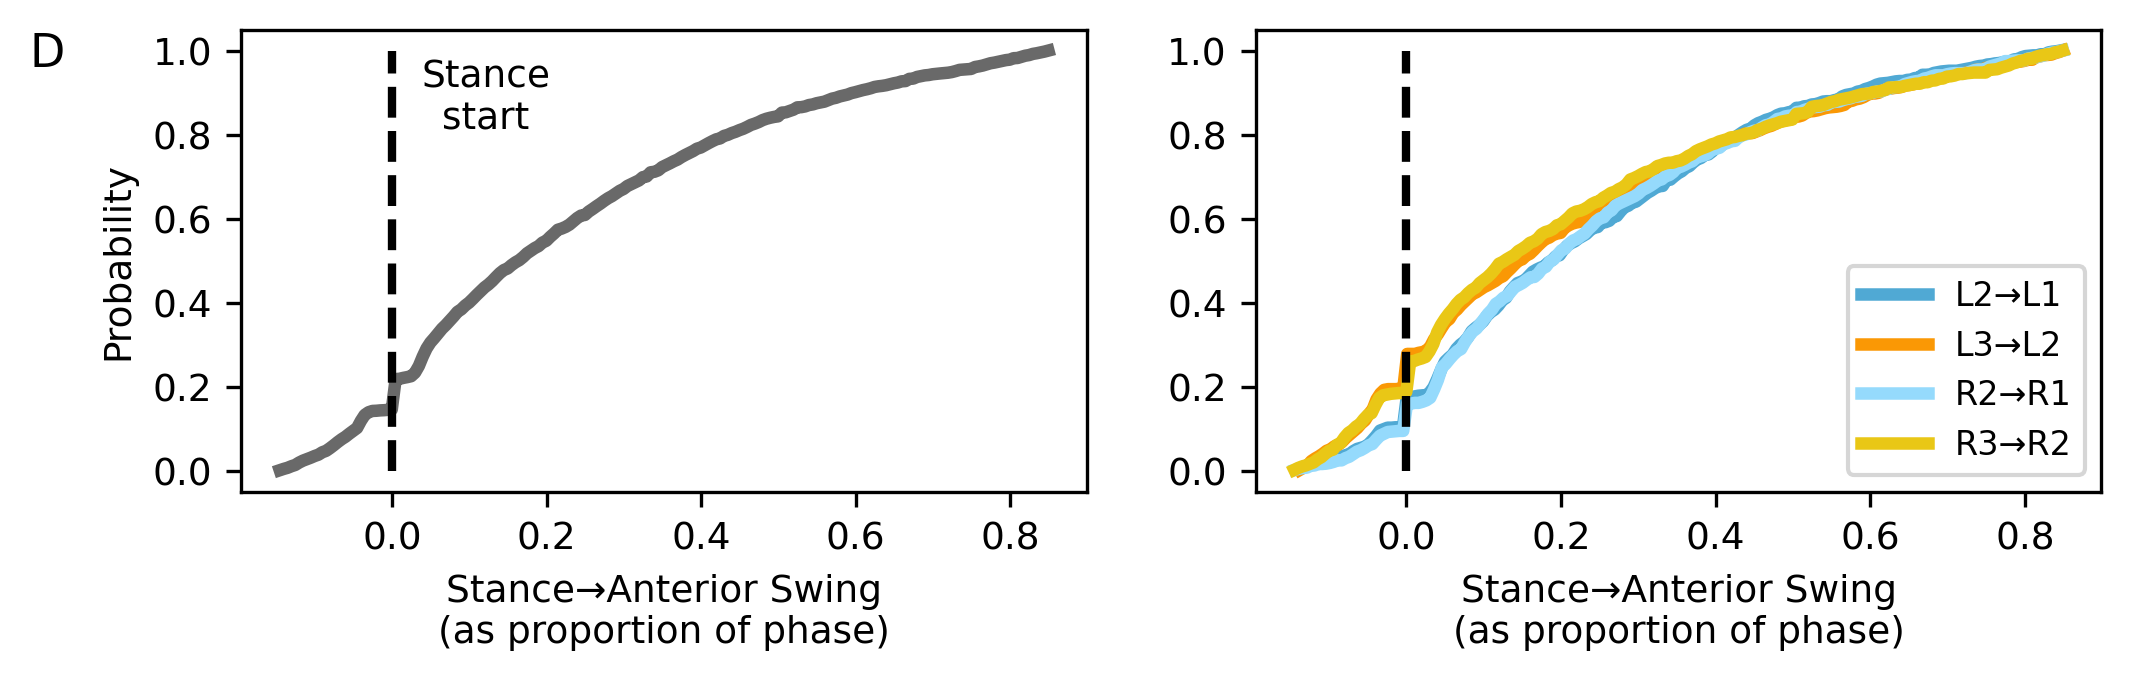

In [8]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(8,2), sharex = True, dpi=300)

proportions = []
speeds = []
offsets = []
for leg in ipsi_offset_legs:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, ipsi_legs[leg], 'stanceswing')

# ==========> offset x axis to just before stance start <==========
threshold = 0.85
proportions = [x if x<=threshold else x-1 for x in proportions]

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax1.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')
print('All Legs:', len(proportions), 'steps')

### Individual legs --> contralateral offsets
leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]
for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, 
                                                          comp[0], comp[1], 'stanceswing')
    
    proportions = [x if x<=threshold else x-1 for x in proportions]
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax2.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label='→'.join(comp))
    print(comp[0], ':', len(proportions), 'steps')

ax1.set_ylabel('Probability',fontsize=tick_fontsize)
ax1.text(swing_averages-0.15, 0.98,'Stance\nstart', fontsize=tick_fontsize, 
         horizontalalignment='center', verticalalignment='top')
ax1.annotate('D', xy=(-0.25, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)
ax2.legend(fontsize=tick_fontsize-1)
for ax in [ax1,ax2]:
    ax.set_xlabel('Stance→Anterior Swing\n(as proportion of phase)',fontsize=tick_fontsize)
    ax.plot([0,0],[0,1],'--k',linewidth=2)
    ax.yaxis.label.set_size(tick_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)   

plt.show()

# Proportion of phase after STANCE start for CONTRALATERAL leg swing
### Nirody Figure S6 D

L3 : 1161 steps
L2 : 1184 steps
L1 : 1203 steps


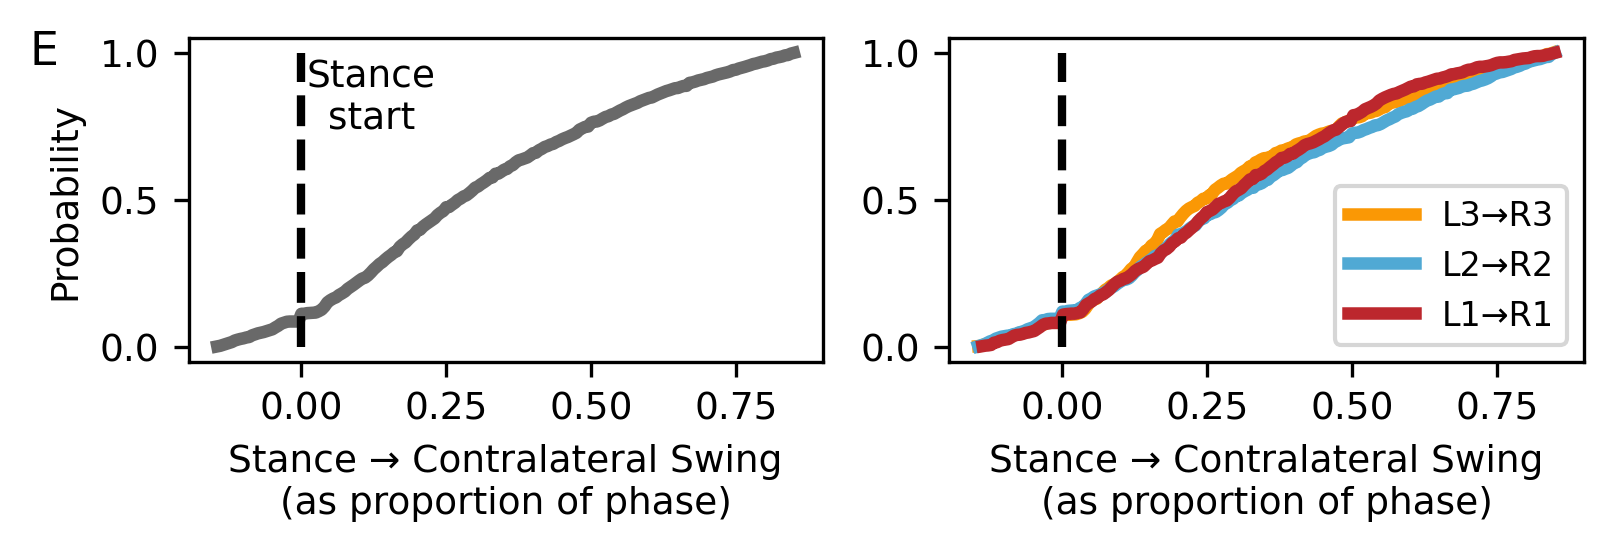

In [9]:
# S6 D
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(6,1.4), dpi=300)

proportions = []
speeds = []
offsets = []
for leg in left_laterals:
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, step_df, leg, contra_legs[leg], 'stanceswing')

# ==========> offset x axis to just before stance start <==========
threshold = 0.85
proportions = [x if x<=threshold else x-1 for x in proportions]    

H,X1 = np.histogram(proportions, bins = 200, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
ax1.plot(X1[1:], F1, linewidth=3, color = all_leg_color, label='all legs')

# seaborn kernel density estimation
# ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, cumulative=True,
#                   stat='probability',line_kws={'linewidth':5},
#                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars

leg_comps = [['L3','R3'],['L2','R2'],['L1','R1']]
plot_cols = [third_pair_color, second_pair_color, first_pair_color]

for i, comp in enumerate(leg_comps):
    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                             step_df, comp[0], comp[1], 'stanceswing')
    proportions = [x if x<=threshold else x-1 for x in proportions]  
    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax2.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label='→'.join(comp))
    print(comp[0], ':', len(proportions), 'steps')

ax1.set_ylabel('Probability',fontsize=tick_fontsize)
ax1.text(swing_averages-0.15, 0.98,'Stance\nstart', fontsize=tick_fontsize, 
         horizontalalignment='center', verticalalignment='top')
ax1.annotate('E', xy=(-0.25, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)
ax2.legend(fontsize=tick_fontsize-1)
for ax in [ax1,ax2]:
    ax.set_xlabel('Stance → Contralateral Swing\n(as proportion of phase)',fontsize=tick_fontsize)
    ax.plot([0,0],[0,1],'--k',linewidth=2)
    ax.yaxis.label.set_size(tick_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)   
    
plt.show()

# Which legs tend to swing together?
* For each leg: a 4x2 matrix showing % of swings with all other legs. 
* Within the reference leg itself, report % swinging alone

In [10]:
# load data from data_file
swing_df = pd.read_excel(excel_file, sheet_name='gait_speeds', index_col=None)
print(swing_df.columns) 
swing_df.head(3)

Index(['frametimes', 'speed (mm/s)', 'speed (bodylength/s)', 'gaits_lateral',
       'swinging_lateral', 'gaits_rear', 'swinging_rear',
       'tetrapod_coordination', 'tetrapod_speed', 'tripod_coordination',
       'tripod_speed', 'clip', 'treatment', 'individual', 'date', 'uniq_id'],
      dtype='object')


,frametimes,speed (mm/s),speed (bodylength/s),gaits_lateral,swinging_lateral,gaits_rear,swinging_rear,tetrapod_coordination,tetrapod_speed,tripod_coordination,tripod_speed,clip,treatment,individual,date,uniq_id
0,0.0303,0.045143,0.171263,pentapod,L1,step,R4,NaN,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris
1,0.0606,0.046496,0.176394,pentapod,L1,step,R4,NaN,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris
2,0.0909,0.047800,0.181342,pentapod,L1,step,R4,NaN,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris


In [11]:
# how many frames are we looking at?
lateral_swings = swing_df['swinging_lateral'].values
rear_swings = swing_df['swinging_rear'].values
print(len(lateral_swings))

48852


In [12]:
# For each leg, get counts of the other legs that are swinging during each frame

leg_counts = {} # key = [ref_leg][other_leg]; val = count for that combo
total_swings = {} # key = leg; val = number of total swings for that leg
legs = ['L1','R1','L2','R2','L3','R3','L4','R4']
for leg in legs:
    leg_counts[leg] = {}
    total_swings[leg] = 0
for ref_leg in leg_counts.keys():
    for leg in legs:
        leg_counts[ref_leg][leg] = 0
# print(leg_counts) # testing OK        

for i,lateral_combo in enumerate(lateral_swings):
    rear_combo = rear_swings[i]
    swinging_legs = []
    if lateral_combo is not np.nan:
        swinging_legs.extend(lateral_combo.split('_'))
    if rear_combo is not np.nan:
        swinging_legs.extend(rear_combo.split('_'))
    
#     print(swinging_legs) # testing OK
    
    if len(swinging_legs) == 1: # only one leg swinging!
        solo_swinger = swinging_legs[0]
        leg_counts[solo_swinger][solo_swinger] += 1
        total_swings[solo_swinger] += 1
    else:
        for ref_leg in swinging_legs:
            total_swings[ref_leg] += 1
            for other_leg in swinging_legs:
                if other_leg != ref_leg:
                    leg_counts[ref_leg][other_leg] += 1
test_leg = 'R2'
print('Swing counts for ', test_leg, leg_counts[test_leg])
print('Total swings for all legs\n', total_swings)

Swing counts for  R2 {'L1': 4024, 'R1': 332, 'L2': 2157, 'R2': 435, 'L3': 4043, 'R3': 847, 'L4': 4470, 'R4': 7821}
Total swings for all legs
 {'L1': 11808, 'R1': 11860, 'L2': 12956, 'R2': 12729, 'L3': 14017, 'R3': 13889, 'L4': 21821, 'R4': 21606}


Proportions for L2:

[[0.02994751 0.29090769]
 [0.03303489 0.16648657]
 [0.0718586  0.3444736 ]
 [0.60443038 0.35690028]]
boundaries:  [0.   0.25 0.5  0.75 1.  ]
showing:
[[0.125 0.375]
 [0.125 0.125]
 [0.125 0.375]
 [0.625 0.375]]


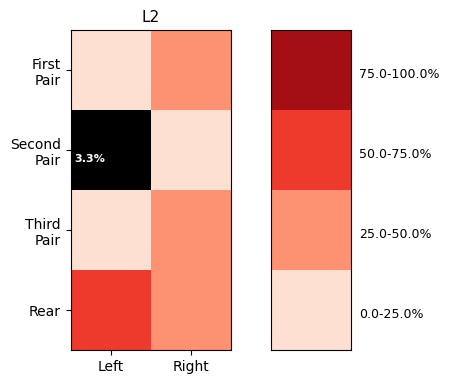

In [13]:
# Functions to make plots

def showSwingCorrelations(ax, leg_to_plot, leg_counts, color_map, num_bins = 1, print_report = False):
    
    cmap = cm.get_cmap(color_map)
    
    # set leg order
    legs = ['L1','R1','L2','R2','L3','R3','L4','R4']
    loc_indices = []
    num_rows = len(legs)/2
    num_cols = len(legs)/num_rows
    for row in np.arange(num_rows):
        for col in np.arange(num_cols):
            loc_indices.append([int(col),-int(row)])
    locs_for_legs = dict(zip(legs, loc_indices))
    
    # convert leg_counts to leg_proportions
    leg_proportions = {}
    for leg in legs:
        leg_proportions[leg] = {}
    
    for ref_leg in legs:
        for other_leg in legs:
            leg_proportions[ref_leg][other_leg] = leg_counts[ref_leg][other_leg] / total_swings[ref_leg]
    
    # get proportion matrix for leg_to_plot
    proportion_matrix = np.array([leg_proportions[leg_to_plot][leg] for leg in legs])
    
    # print out some info if print_report is True
    if print_report:
        print('Proportions for ' + leg_to_plot + ':\n')
        print(proportion_matrix.reshape([4,2]))

    # if num_bins is greater than 1, we will show proportions divided into bins
    # if num_bins is 0 or 1, we will show raw proportions 
    if num_bins <= 1:
        to_show = proportion_matrix
    else:
        proportion_boundaries = np.linspace(0,1,num_bins+1)
        proportion_bins = np.zeros(len(proportion_matrix))
        for i, proportion in enumerate(proportion_matrix):
            for j, bin in enumerate(proportion_boundaries[:-1]):
                if proportion_boundaries[j] < proportion and proportion <= proportion_boundaries[j+1]:
                    proportion_bins[i] = np.mean([proportion_boundaries[j],proportion_boundaries[j+1]])
        to_show = proportion_bins

    # go through to_show and make a rectangle (KLUGEY) of appropriate color    
    for i,leg in enumerate(legs):
        [x,y] = locs_for_legs[leg]        
        rectLowerLeftx = x-0.5
        rectLowerLefty = y-0.5
        if leg == leg_to_plot:
            rect_color = 'k'
        else:
            rect_color = cmap(to_show[i])
        rect = patches.Rectangle((rectLowerLeftx,rectLowerLefty),1,1,facecolor=rect_color)
        ax.add_patch(rect)

    # in box for leg_to_plot, write in the percentage swinging alone
    
    swinging_alone = leg_proportions[leg_to_plot][leg_to_plot]
    perc = str(np.round(swinging_alone * 100,1)) + '%'
    
    [textx, texty] = locs_for_legs[leg_to_plot]
#     print(leg_to_plot, texty, textx) # testing OK
    
    xbuff = 0.45
    ybuff = 0.15
    
    ax.text(textx-xbuff, texty-ybuff, perc, color='w', fontsize=8, fontweight='bold')
    
    if print_report:
        print('boundaries: ', proportion_boundaries)
        print('showing:')
        print(to_show.reshape([4,2]))

    ax.set_title(leg_to_plot, fontsize=axis_fontsize)
    ax.set_yticks(np.arange(-num_rows+1,1))
    ax.set_yticklabels(['Rear','Third\nPair','Second\nPair','First\nPair'])
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Left','Right'])
    ax.set_xlim([-0.5,1.5])
    ax.set_ylim([-num_rows+0.5,0.5])
    
    return ax

# homemade legend for these!
def makeLegendForColorBins(ax, num_bins, color_map):

    cmap = cm.get_cmap(color_map)
    proportion_boundaries = np.linspace(0,1,num_bins+1)
    plot_levels = np.zeros(num_bins)
    labels = []
    cols = []
    for i, level in enumerate(proportion_boundaries[:-1]):
        lower_boundary = np.round(proportion_boundaries[i],2)
        upper_boundary = np.round(proportion_boundaries[i+1],2)
        mid_point = np.mean([lower_boundary, upper_boundary])
        plot_levels[i] = mid_point
        labels.append(str(np.round(lower_boundary*100,1)) + '-' + str(np.round(upper_boundary*100,1)) + '%')
        cols.append(cmap(mid_point))
    
    ax.set_ylim([0,num_bins])
    ax.set_xlim([0,1])
    for i, label in enumerate(labels):
        ax.text(1.1, 0.4+i, label, fontsize=tick_fontsize)
        llx = 0
        lly = i
        rect = patches.Rectangle((llx,lly),1,1,facecolor=cols[i])
        ax.add_patch(rect)
    
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

f = plt.figure(figsize=(4,4))
leg_to_plot = 'L2'
num_bins = 4
cmap = 'Reds'
ax1 = f.add_axes([0.1,0.1,0.4,0.8])
ax1 = showSwingCorrelations(ax1, leg_to_plot, leg_counts, cmap, num_bins, True)
ax2 = f.add_axes([0.6, 0.1, 0.2, 0.8])
ax2 = makeLegendForColorBins(ax2, num_bins, cmap)
plt.show()

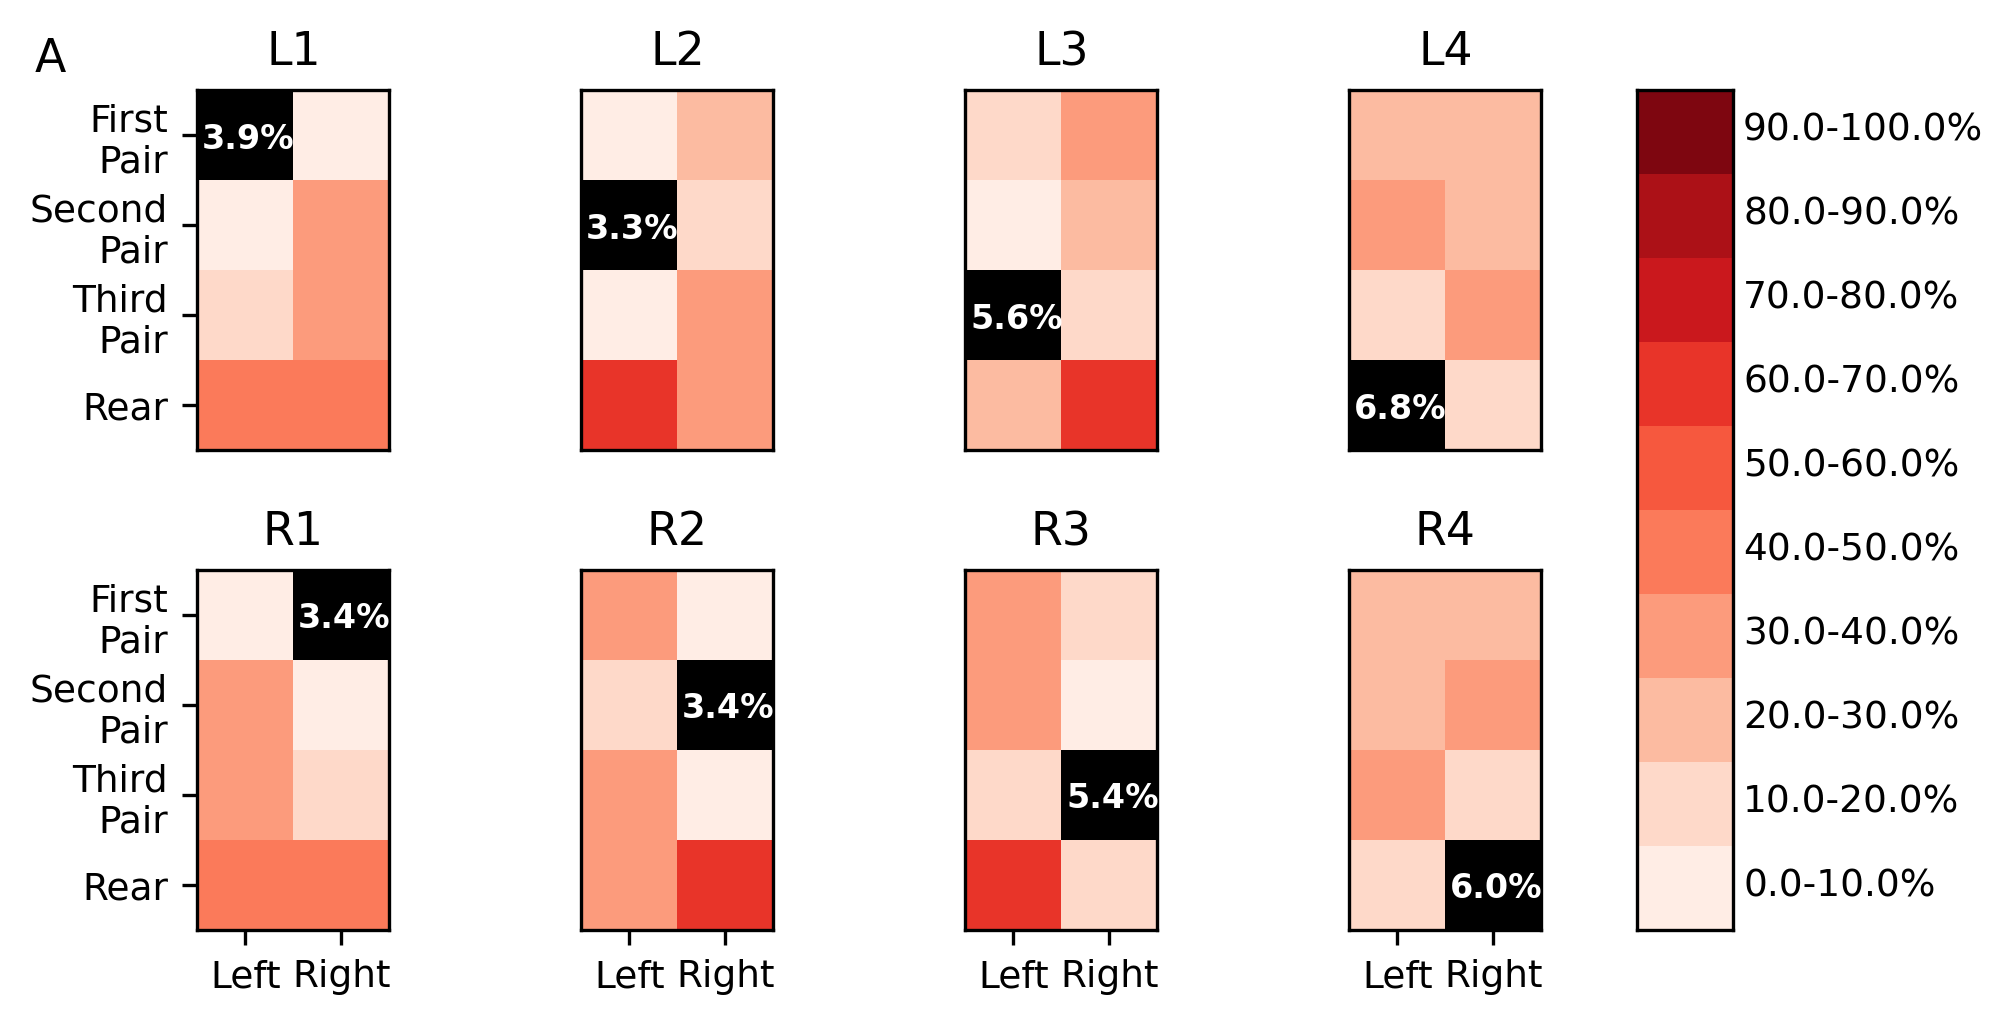

In [14]:
# Show all the legs on a single plot
num_bins = 10 # 4, 5, or 10
cmap = 'Reds'

f = plt.figure(figsize=(8,4), dpi=300)

lefta = [0.1, 0.26, 0.42, 0.58]
bottoma = 0.1
mida = 0.5
a_width = 0.08
a_height = 0.3

a1 = f.add_axes([lefta[0], mida, a_width, a_height])
a2 = f.add_axes([lefta[1], mida, a_width, a_height])
a3 = f.add_axes([lefta[2], mida, a_width, a_height])
a4 = f.add_axes([lefta[3], mida, a_width, a_height])
a5 = f.add_axes([lefta[0], bottoma, a_width, a_height])
a6 = f.add_axes([lefta[1], bottoma, a_width, a_height])
a7 = f.add_axes([lefta[2], bottoma, a_width, a_height])
a8 = f.add_axes([lefta[3], bottoma, a_width, a_height])

leg_order_to_plot = ['L1','L2','L3','L4','R1','R2','R3','R4']
ax_list = [a1,a2,a3,a4,a5,a6,a7,a8]

for i,leg in enumerate(leg_order_to_plot):
    ax_list[i] = showSwingCorrelations(ax_list[i], leg, leg_counts, cmap, num_bins)
    ax_list[i].yaxis.label.set_size(tick_fontsize)
    ax_list[i].tick_params(axis='both', which='major', labelsize=tick_fontsize) 
if num_bins > 1:
    if num_bins <= 5:
        a9 = f.add_axes([0.7, mida, 0.04, a_height])
    else:
        a9 = f.add_axes([0.7, 0.1, 0.04, 0.7])
    a9 = makeLegendForColorBins(a9, num_bins, cmap)
    
for ax in [a1,a2,a3,a4]:
    ax.set_xticks([])
    
for ax in [a2,a3,a4,a6,a7,a8]:
    ax.set_yticks([])

a1.annotate('A', xy=(-0.85, 1.05), xycoords='axes fraction', fontsize=axis_fontsize)
    
plt.show()

# Compare timing of REAR swing and stance with other legs

### on OPPOSITE side ... interesting? Third leg swing
Opposite third leg swings after rear swing because rear goes to stance just before opposite rear swings . . .

In [15]:
# average swing durations for rear legs
rear_avg_swings = {}
for leg in ['L4','R4']:
    rear_avg_swings[leg] = np.mean(step_df[step_df['legID']==leg].swing.values)
    print(leg,rear_avg_swings[leg])
    
overall_average_swing_rear =  np.mean(step_df[step_df['legID'].isin(['L4','R4'])].swing.values)
print('overall average = ', overall_average_swing_rear)

L4 0.3758415359653867
R4 0.37372056429734124
overall average =  0.37478277356446366


getting data for L4→L3
getting data for R4→R3
  plotting data for pair 3
getting data for L4→L2
getting data for R4→R2
  plotting data for pair 2
getting data for L4→L1
getting data for R4→R1
  plotting data for pair 1


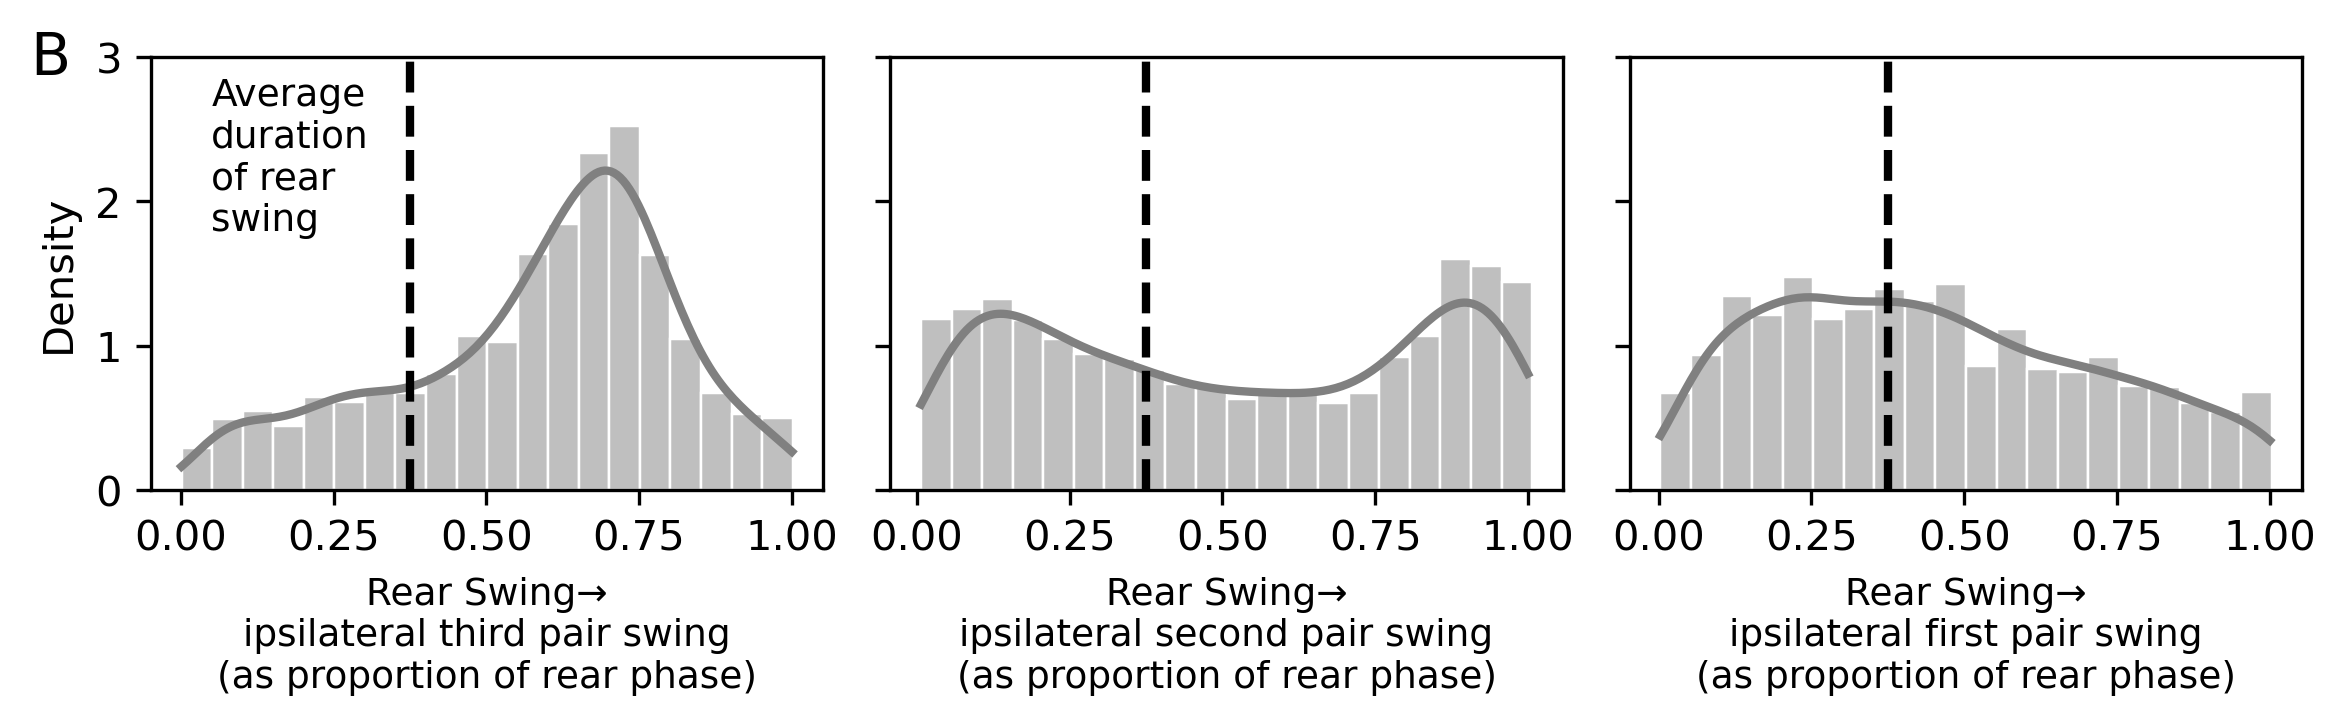

In [92]:
f, [a1,a2,a3] = plt.subplots(1,3, figsize=(8,2.5), dpi = 300, sharey=True)

axes = [a1,a2,a3]

# for all rear legs, get ipsilateral swings for 3rd, 2nd, 1st pair
rear_legs = ['L4','R4']

other_pairs = ['3','2','1']
other_pair_labels = ['third','second','first']

for i, pair in enumerate(other_pairs):
    
    offsets, proportions, speeds = [[],[],[]]

    for leg in rear_legs:
        other_leg = leg[0] + pair
        print('getting data for ' + leg + '→' + other_leg)
        offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                              step_df, leg, other_leg, 'swingswing')
    
    print('  plotting data for pair ' + pair)
    ax = axes[i]
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color='gray', edgecolor='w', visible=True)
    ax.plot([overall_average_swing_rear, overall_average_swing_rear], [0,4], '--k', linewidth=2)

    ax.set_ylim([0,3])
    ax.set_xlabel('Rear Swing→\nipsilateral ' + other_pair_labels[i] + 
                  ' pair swing\n(as proportion of rear phase)', fontsize=tick_fontsize)
    
a1.text(0.05,1.8,s='Average\nduration\nof rear\nswing',fontsize=tick_fontsize)    
a1.annotate('B', xy=(-0.18, 0.96), xycoords='axes fraction', fontsize=14)
plt.tight_layout()
plt.show()

getting data for L4→L3
getting data for R4→R3
  plotting data for pair 3
getting data for L4→L2
getting data for R4→R2
  plotting data for pair 2
getting data for L4→L1
getting data for R4→R1
  plotting data for pair 1


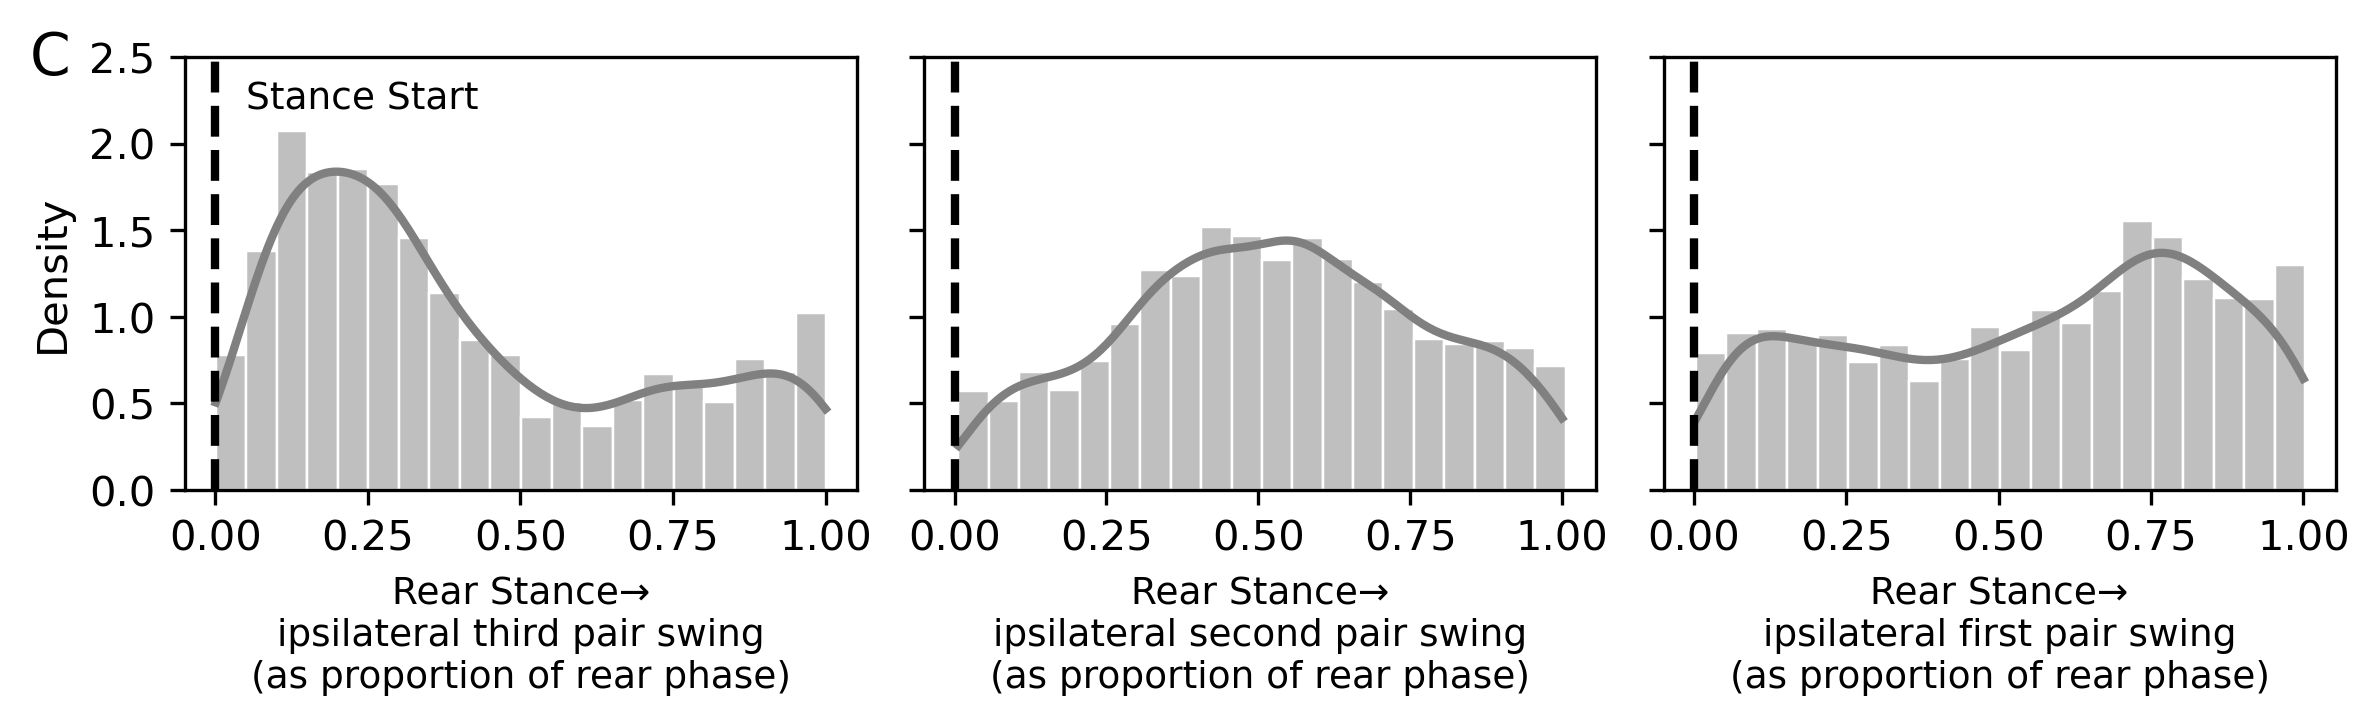

In [93]:
f, [a1,a2,a3] = plt.subplots(1,3, figsize=(8,2.5), dpi = 300, sharey=True)

axes = [a1,a2,a3]

# for all rear legs, get ipsilateral swings for 3rd, 2nd, 1st pair
rear_legs = ['L4','R4']

other_pairs = ['3','2','1']
other_pair_labels = ['third','second','first']

for i, pair in enumerate(other_pairs):
    
    offsets, proportions, speeds = [[],[],[]]

    for leg in rear_legs:
        other_leg = leg[0] + pair
        print('getting data for ' + leg + '→' + other_leg)
        offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                              step_df, leg, other_leg, 'stanceswing')
    
    print('  plotting data for pair ' + pair)
    ax = axes[i]
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color='gray', edgecolor='w', visible=True)
    ax.plot([0, 0], [0,4], '--k', linewidth=2)

    ax.set_ylim([0,2.5])
    ax.set_xlabel('Rear Stance→\nipsilateral ' + other_pair_labels[i] + 
                  ' pair swing\n(as proportion of rear phase)', fontsize=tick_fontsize)
    
a1.text(0.05,2.2,s='Stance Start',fontsize=tick_fontsize)    
a1.annotate('C', xy=(-0.23, 0.96), xycoords='axes fraction', fontsize=14)
plt.tight_layout()
plt.show()

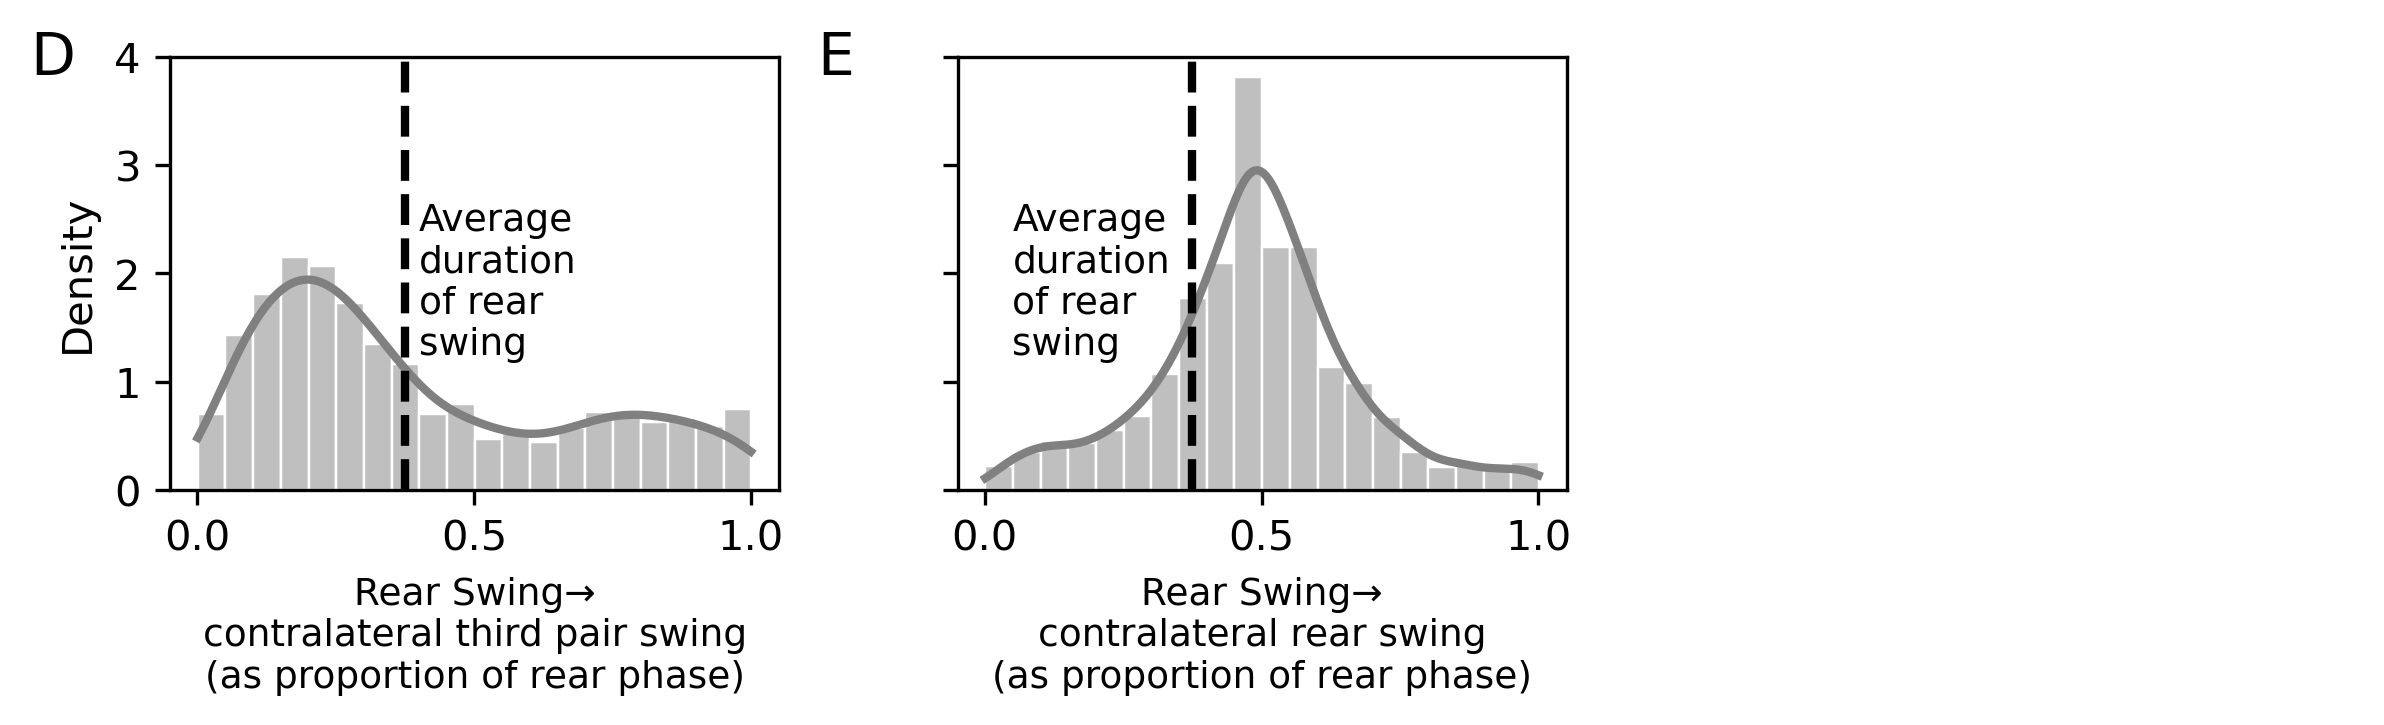

In [94]:
# D = rear swings vs. contralateral 3rd swings
f, [a1,a2,a3] = plt.subplots(1,3, figsize=(8,2.5), dpi = 300, sharey=True)
a3.set_axis_off()
maxy=4

offsets, proportions, speeds = [[],[],[]]
offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                              step_df, 'R4', 'L3', 'swingswing')
offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                              step_df, 'L4', 'R3', 'swingswing')
a1 = sns.histplot(proportions, ax=a1, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color='gray', edgecolor='w', visible=True)
a1.plot([overall_average_swing_rear, overall_average_swing_rear], [0,maxy], '--k', linewidth=2)
a1.set_xlabel('Rear Swing→\ncontralateral third pair swing\n(as proportion of rear phase)', 
              fontsize=tick_fontsize)
a1.annotate('D', xy=(-0.23, 0.96), xycoords='axes fraction', fontsize=14)
a1.text(0.4,1.25,s='Average\nduration\nof rear\nswing',fontsize=tick_fontsize) 

offsets, proportions, speeds = [[],[],[]]
offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                              step_df, 'R4', 'L4', 'swingswing')
offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                              step_df, 'L4', 'R4', 'swingswing')
a2 = sns.histplot(proportions, ax=a2, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color='gray', edgecolor='w', visible=True)
a2.plot([overall_average_swing_rear, overall_average_swing_rear], [0,maxy], '--k', linewidth=2)
a2.text(0.05,1.25,s='Average\nduration\nof rear\nswing',fontsize=tick_fontsize) 
a2.set_xlabel('Rear Swing→\ncontralateral rear swing\n(as proportion of rear phase)', 
              fontsize=tick_fontsize)
a2.annotate('E', xy=(-0.23, 0.96), xycoords='axes fraction', fontsize=14)
a2.set_ylim([0,maxy])

plt.tight_layout()
plt.show()

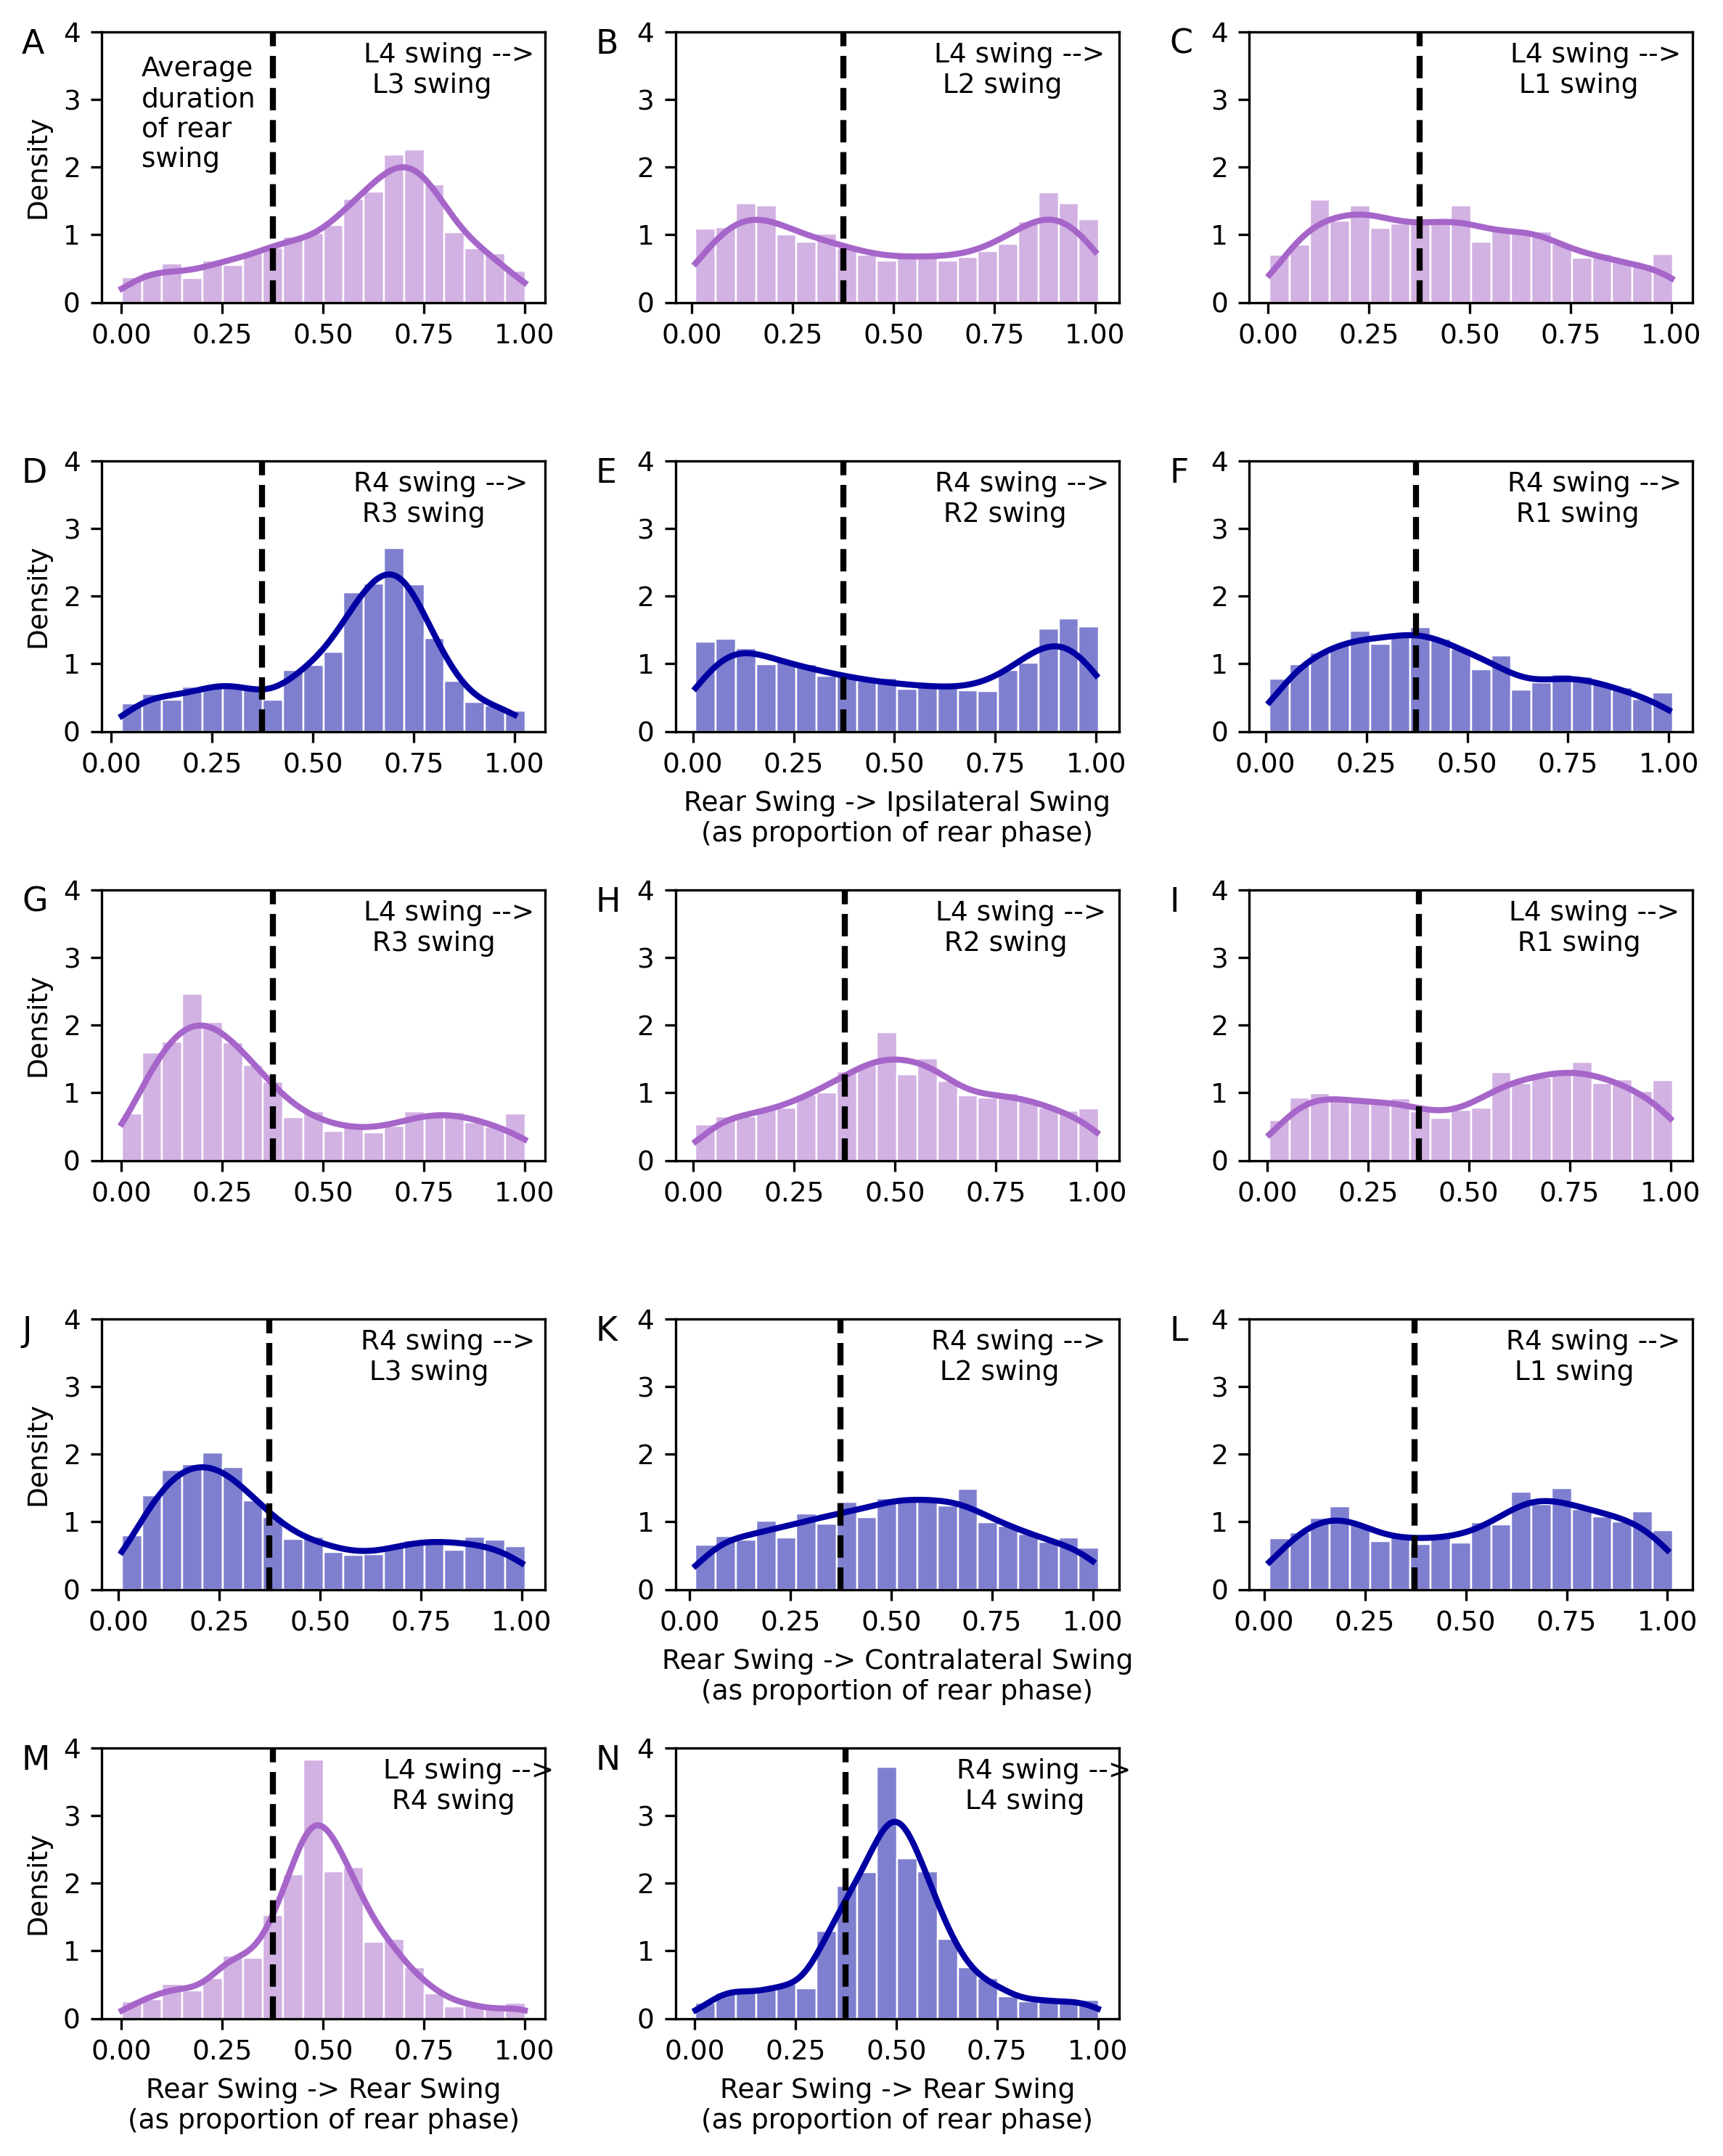

In [18]:
# pairwise comparison between each rear leg and all other legs 
f,[[a1,a2,a3],[a4,a5,a6],[a7,a8,a9],[a10,a11,a12],[a13,a14,a15]] = plt.subplots(5,3, figsize=(8,10),dpi=300)

# comparison to IPSILATERAL anterior swings   
leg_comps = [['L4','L3'],['L4','L2'],['L4','L1'],['R4','R3'],['R4','R2'],['R4','R1']]
plot_cols = [rear_leg_color] * 3 + [rear_leg_color_alt] * 3
for i, ax in enumerate([a1,a2,a3,a4,a5,a6]):
    proportions = []
    speeds = []
    offsets = []
    offsets, offsetsproportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                                 step_df, leg_comps[i][0], leg_comps[i][1])
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=plot_cols[i], edgecolor='w', visible=True) # can set to false to hide bars
    
    ax.text(0.6, 3.1, s=leg_comps[i][0] + ' swing -->\n ' + leg_comps[i][1] + ' swing', fontsize=tick_fontsize)
    ax.plot([rear_avg_swings[leg_comps[i][0]], rear_avg_swings[leg_comps[i][0]]], [0,4], '--k', linewidth=2)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.yaxis.label.set_text('')
    ax.set_ylim([0,4])

# comparison to CONTRALATERAL anterior swings    
leg_comps = [['L4','R3'],['L4','R2'],['L4','R1'],['R4','L3'],['R4','L2'],['R4','L1']]
plot_cols = [rear_leg_color] * 3 + [rear_leg_color_alt] * 3
for i, ax in enumerate([a7,a8,a9,a10,a11,a12]):
    proportions = []
    speeds = []
    offsets = []
    offsets, offsetsproportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                                 step_df, leg_comps[i][0], leg_comps[i][1])
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=plot_cols[i], edgecolor='w', visible=True) # can set to false to hide bars
    
    ax.text(0.6, 3.1, s=leg_comps[i][0] + ' swing -->\n ' + leg_comps[i][1] + ' swing', fontsize=tick_fontsize)
    ax.plot([rear_avg_swings[leg_comps[i][0]], rear_avg_swings[leg_comps[i][0]]], [0,4], '--k', linewidth=2)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.yaxis.label.set_text('')
    ax.set_ylim([0,4])

# left-to-right swings
leg_comps = [['L4','R4'],['R4','L4']]
plot_cols = [rear_leg_color,rear_leg_color_alt]
for i, ax in enumerate([a13,a14]):
    proportions = []
    speeds = []
    offsets = []
    offsets, offsetsproportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                                 step_df, leg_comps[i][0], leg_comps[i][1])
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=plot_cols[i], edgecolor='w', visible=True) # can set to false to hide bars
    
    ax.text(0.65, 3.1, s=leg_comps[i][0] + ' swing -->\n ' + leg_comps[i][1] + ' swing', fontsize=tick_fontsize)
    ax.plot([rear_avg_swings[leg_comps[i][0]], rear_avg_swings[leg_comps[i][0]]], [0,4], '--k', linewidth=2)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.set_ylim([0,4])

for ax in [a1,a4,a7,a10,a13]:
    ax.yaxis.label.set_text('Density') # cool
    ax.yaxis.label.set_size(tick_fontsize)  
    ax.xaxis.label.set_size(tick_fontsize)

a1.text(0.05,2,s='Average\nduration\nof rear\nswing',fontsize=tick_fontsize)
a5.set_xlabel('Rear Swing -> Ipsilateral Swing\n(as proportion of rear phase)', fontsize=tick_fontsize)
a11.set_xlabel('Rear Swing -> Contralateral Swing\n(as proportion of rear phase)', fontsize=tick_fontsize)
a13.set_xlabel('Rear Swing -> Rear Swing\n(as proportion of rear phase)', fontsize=tick_fontsize)
a14.set_xlabel('Rear Swing -> Rear Swing\n(as proportion of rear phase)', fontsize=tick_fontsize)
a14.set_ylabel('')

letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
for i,ax in enumerate([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]):
#     ax.set_yticks([])
    ax.annotate(letters[i], xy=(-0.18, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

a15.set_axis_off()
plt.tight_layout()
plt.show()

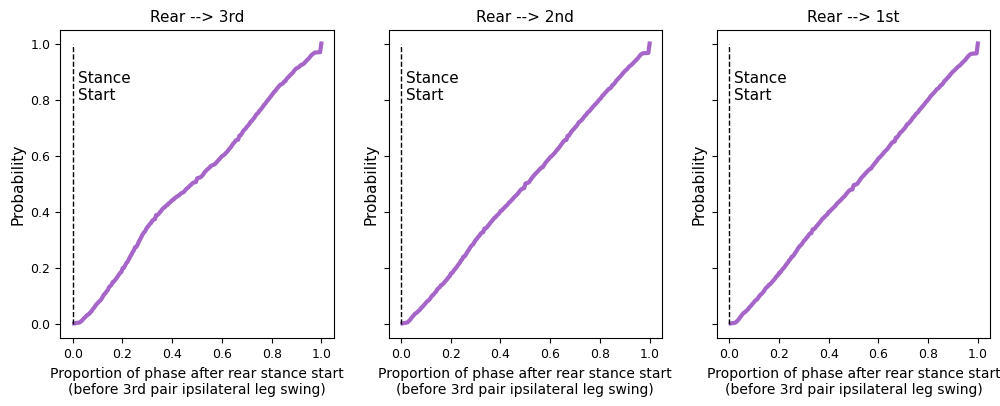

In [19]:
# Plot rear STANCES to ipsilateral (3rd pair) swings

'''
Rear step down to ipsilateral leg swing. 
Predict a strong relationship b/c rear leg tends to swing with opposite adjacent leg 
... and rear leg swings when the other rear leg gets set down
'''
proportions = []
speeds = []
offsets = []
third_ipsi = {'R4':'R3','L4':'L3'}
second_ipsi = {'R4':'R2','L4':'L2'}
first_ipsi = {'R4':'R1','L4':'L1'}
title_str = ['3rd','2nd','1st']

fig, ax_list = plt.subplots(1,3,figsize=(12,4),sharey=True)

for i, comp in enumerate([third_ipsi, second_ipsi, first_ipsi]):

    # get data for 'R4'
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, comp['R4'], 'stanceswing')
    # get data for 'L4'
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, comp['L4'], 'stanceswing')

    # offset x axis to just before stance start
#     threshold = 0.95
#     proportions = [x if x<=threshold else x-1 for x in proportions]

    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax_list[i].plot(X1[1:], F1, linewidth=3, color = rear_leg_color, label='rear legs')
    # ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True, kde=True,
    #                   stat='probability',line_kws={'linewidth':5},
    #                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
    ax_list[i].set_xlabel('Proportion of phase after rear stance start\n(before 3rd pair ipsilateral leg swing)',fontsize=10)
    ax_list[i].plot([0,0],[0,1],'--k',linewidth=1)
    ax_list[i].text(0.02,0.8,'Stance\nStart',fontsize=axis_fontsize)
    ax_list[i].yaxis.label.set_size(10)
    ax_list[i].set_ylabel('Probability',fontsize=axis_fontsize)
    ax_list[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)  
    ax_list[i].set_title('Rear --> ' + title_str[i], fontsize=axis_fontsize)
#     ax_list[i].legend()
plt.show()

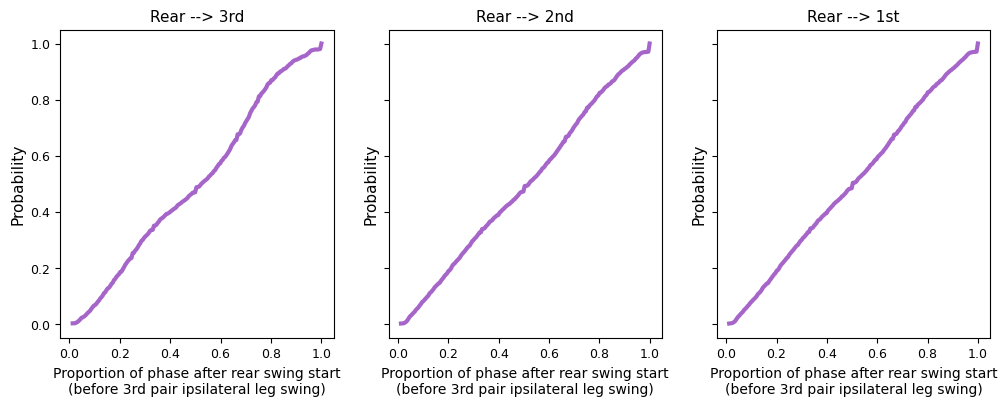

In [20]:
# Plot rear SWINGS to ipsilateral (3rd pair) swings

proportions = []
speeds = []
offsets = []
third_ipsi = {'R4':'R3','L4':'L3'}
second_ipsi = {'R4':'R2','L4':'L2'}
first_ipsi = {'R4':'R1','L4':'L1'}
title_str = ['3rd','2nd','1st']

fig, ax_list = plt.subplots(1,3,figsize=(12,4),sharey=True)

for i, comp in enumerate([third_ipsi, second_ipsi, first_ipsi]):

    # get data for 'R4'
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, comp['R4'], 'swingswing')
    # get data for 'L4'
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, leg, comp['L4'], 'swingswing')

    # offset x axis to just before stance start
#     threshold = 0.95
#     proportions = [x if x<=threshold else x-1 for x in proportions]

    H,X1 = np.histogram(proportions, bins = 200, density = True )
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    ax_list[i].plot(X1[1:], F1, linewidth=3, color = rear_leg_color, label='rear legs')
    # ax = sns.histplot(proportions, ax=ax, binwidth=0.05, cumulative=True, kde=True,
    #                   stat='probability',line_kws={'linewidth':5},
    #                   color=all_leg_color, edgecolor='w', visible=False) # can set to False to hide bars
    ax_list[i].set_xlabel('Proportion of phase after rear swing start\n(before 3rd pair ipsilateral leg swing)',fontsize=10)
    # plot timing of event shown
    # ax_list[i].plot([0,0],[0,1],'--k',linewidth=1)
    # ax_list[i].text(0.02,0.8,'Swing\nStart',fontsize=14)
    ax_list[i].yaxis.label.set_size(10)
    ax_list[i].set_ylabel('Probability',fontsize=axis_fontsize)
    ax_list[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)  
    ax_list[i].set_title('Rear --> ' + title_str[i], fontsize=axis_fontsize)
#     ax_list[i].legend()
plt.show()

# Metachronal Lag vs. Gait cycle in fast vs. slow (vs. medium) speed bins

In [21]:
# load the step_timing data into a dataframe
step_df = pd.read_excel(excel_file, sheet_name='step_timing', index_col=None)
step_df.head(3)

,legID,DownTime,UpTime,stance,swing,gait,duty,midSwingTime,L1_mid_swings,R1_mid_swings,...,anterior_offsets,contralateral_offsets,metachronal_lag,mcl_LR_ratio,L3_bearing_change,clip,treatment,individual,date,uniq_id
0,L1,0.272,1.151,0.879,0.242,1.121,0.7841,1.2720,L1:0.8921,R1:,...,NaN,0.667,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris
1,L1,1.393,2.606,1.213,0.303,1.516,0.8001,2.7575,L1:0.9001,R1:0.3701,...,NaN,1.030,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris
2,L1,2.909,4.090,1.181,0.334,1.515,0.7795,4.2570,L1:0.8898,R1:0.5597,...,NaN,0.879,NaN,NaN,NaN,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris


In [22]:
# print(step_df.columns)
# print(step_df['distance_during_step_scaled'].values[:20]) # testing
# print(step_df['average_tardigrade_length'].values[:20]) # testing
body_length_during_step = step_df['distance_during_step_scaled'].values * 1000 / step_df['average_tardigrade_length'].values
print(body_length_during_step[:20]) #
step_df['body_length_during_step'] = body_length_during_step
body_length_persec_during_step = body_length_during_step / step_df['stance'].values
step_df['body_length_persec_during_step'] = body_length_persec_during_step
print(body_length_persec_during_step[:20])
norm_ML = step_df['metachronal_lag'].values / step_df['gait'].values
step_df['norm_metachronal_lag'] = norm_ML

[0.16657189 0.21274945 0.16183088 0.16690058 0.17177763 0.17549537
 0.18990608 0.22384211 0.19248507 0.19898854 0.17449113 0.13563278
 0.19781413 0.18030863 0.20155749 0.18777709 0.1684968  0.20221839
 0.15636956 0.14962057]
[0.18950158 0.17539114 0.13702869 0.183609   0.17177763 0.16085735
 0.16940774 0.14478791 0.17642994 0.1875481  0.18582655 0.16581024
 0.16735544 0.15665389 0.19568688 0.18230786 0.17370804 0.13907729
 0.17809745 0.17041067]


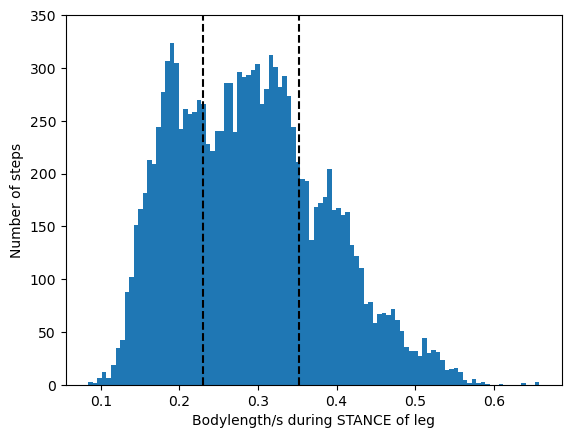

In [23]:
plt.hist(body_length_persec_during_step,bins=100)
plt.ylabel('Number of steps')
plt.xlabel('Bodylength/s during STANCE of leg')
speed_boundaries = [0,0.23,0.352,1] # are from 04 Offsets and Speeds and Gait Styles
for i in [1,2]:
    plt.plot([speed_boundaries[i],speed_boundaries[i]],[0,370],'--k')
plt.ylim([0,350])
plt.show()

In [24]:
# get steps with metachronal lag
ml_steps = step_df[step_df['norm_metachronal_lag']> 0]
print(len(ml_steps))
ml_steps.head(3)

2793


,legID,DownTime,UpTime,stance,swing,gait,duty,midSwingTime,L1_mid_swings,R1_mid_swings,...,mcl_LR_ratio,L3_bearing_change,clip,treatment,individual,date,uniq_id,body_length_during_step,body_length_persec_during_step,norm_metachronal_lag
21,L3,0.030,0.848,0.818,0.303,1.121,0.7297,0.9995,L1:,R1:,...,-0.024412,6.927667,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris,0.165976,0.202905,1.568243
22,L3,1.151,1.939,0.788,0.303,1.091,0.7223,2.0905,L1:0.1109,R1:0.736,...,0.266661,-11.430000,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris,0.135767,0.172293,1.971586
23,L3,2.242,3.272,1.030,0.273,1.303,0.7905,3.4085,L1:0.3956,R1:,...,0.414804,1.610000,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris,0.153223,0.148760,1.581734


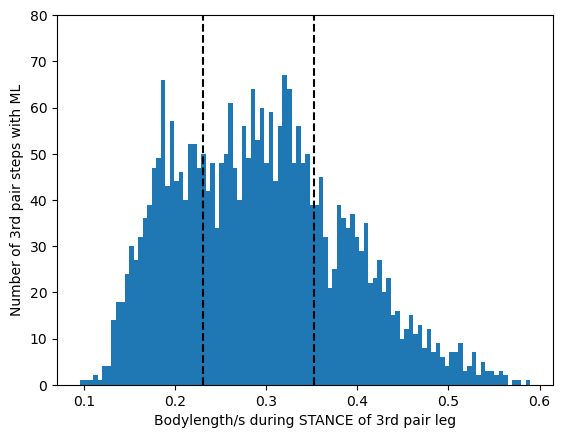

In [25]:
plt.hist(ml_steps['body_length_persec_during_step'].values,bins=100)
plt.ylabel('Number of 3rd pair steps with ML')
plt.xlabel('Bodylength/s during STANCE of 3rd pair leg')
maxy = 80
speed_boundaries = [0,0.23,0.352,1] # are from 04 Offsets and Speeds and Gait Styles
for i in [1,2]:
    plt.plot([speed_boundaries[i],speed_boundaries[i]],[0,maxy],'--k')
plt.ylim([0,maxy])
plt.show()

In [26]:
# get steps from SLOW group and plot period vs. ML
# get steps from MEDIUM group and plot period vs. ML
# get steps from FAST group and plot period vs. ML

slow = ml_steps[ml_steps['body_length_persec_during_step'].between(speed_boundaries[0], speed_boundaries[1],
                                                                  inclusive='neither')]
medium = ml_steps[ml_steps['body_length_persec_during_step'].between(speed_boundaries[1], speed_boundaries[2],
                                                                  inclusive='neither')]
fast = ml_steps[ml_steps['body_length_persec_during_step'].between(speed_boundaries[2], speed_boundaries[3],
                                                                  inclusive='neither')]

print(len(slow), len(medium), len(fast), len(slow)+len(medium)+len(fast), len(ml_steps))
slow.head(3)

# regression and slope for each

811 1265 717 2793 2793


,legID,DownTime,UpTime,stance,swing,gait,duty,midSwingTime,L1_mid_swings,R1_mid_swings,...,mcl_LR_ratio,L3_bearing_change,clip,treatment,individual,date,uniq_id,body_length_during_step,body_length_persec_during_step,norm_metachronal_lag
21,L3,0.030,0.848,0.818,0.303,1.121,0.7297,0.9995,L1:,R1:,...,-0.024412,6.927667,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris,0.165976,0.202905,1.568243
22,L3,1.151,1.939,0.788,0.303,1.091,0.7223,2.0905,L1:0.1109,R1:0.736,...,0.266661,-11.430000,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris,0.135767,0.172293,1.971586
23,L3,2.242,3.272,1.030,0.273,1.303,0.7905,3.4085,L1:0.3956,R1:,...,0.414804,1.610000,iw_11Dec_exemplaris_tardigrade01_000-010,exemplaris,1,11dec,iw_11dec_tardigrade01_exemplaris,0.153223,0.148760,1.581734


In [27]:
def scat(ax,x,y,col,xlab,ylab):
    r,p = stats.spearmanr(x,y)
    marker_size = 5
    marker_color = col
    marker_alpha = 0.2
    if p < 0.05:
        sns.regplot(ax=ax, x=x, y=y, scatter_kws={'s':marker_size,'color':marker_color,'alpha':marker_alpha}, 
                    line_kws={'color':marker_color,'linewidth':2})
    else:
        ax.scatter(x,y,s=marker_size,alpha=marker_alpha,color=marker_color)
    print(xlab + ' vs. ' + ylab + ' ρ = ' + str(np.round(r,3)) +  ', p = ', str(np.round(p,3)))
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    print('n = ' + str(len(x)))
    return ax

period vs. metachronal lag ρ = 0.103, p =  0.003
n = 811
period vs. metachronal lag ρ = 0.286, p =  0.0
n = 1265
period vs. metachronal lag ρ = 0.085, p =  0.024
n = 717


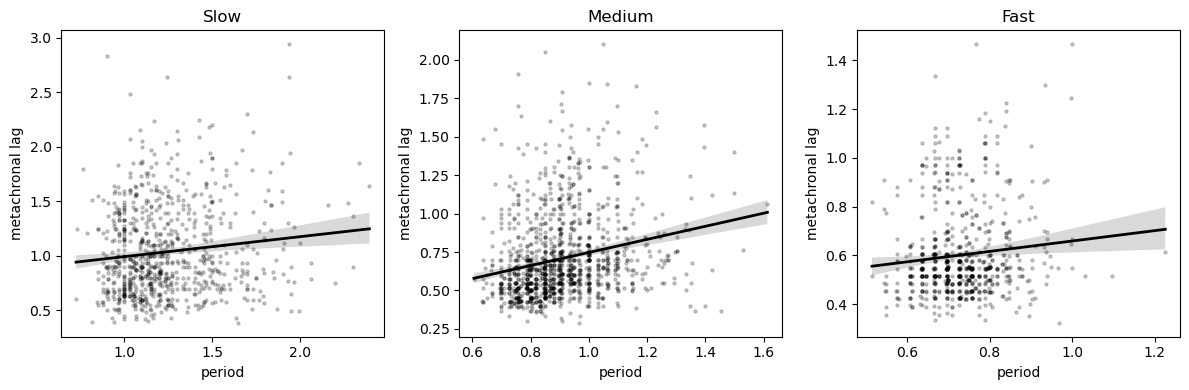

In [28]:
f,(a1,a2,a3) = plt.subplots(1,3,figsize=(12,4))
a1 = scat(a1,slow['gait'].values,slow['metachronal_lag'].values,'k',
         'period','metachronal lag')
a1.set_title('Slow')
a2 = scat(a2,medium['gait'].values,medium['metachronal_lag'].values,'k',
         'period','metachronal lag')
a2.set_title('Medium')
a3 = scat(a3,fast['gait'].values,fast['metachronal_lag'].values,'k',
         'period','metachronal lag')
a3.set_title('Fast')

# for ax in [a1,a2,a3]:
#     ax.set_xlim([0.6, 2.6])
#     ax.set_ylim([0.25, 3])

plt.tight_layout()
plt.show()

period vs. metachronal lag ρ = 0.103, p =  0.003
n = 811
period vs. metachronal lag ρ = 0.286, p =  0.0
n = 1265
period vs. metachronal lag ρ = 0.085, p =  0.024
n = 717


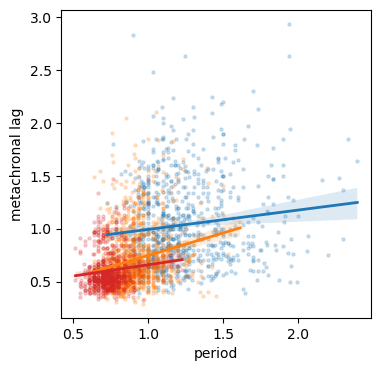

In [29]:
f,a = plt.subplots(1,1,figsize=(4,4))

a = scat(a,slow['gait'].values,slow['metachronal_lag'].values,'tab:blue',
         'period','metachronal lag')

a = scat(a,medium['gait'].values,medium['metachronal_lag'].values,'tab:orange',
         'period','metachronal lag')

a = scat(a,fast['gait'].values,fast['metachronal_lag'].values,'tab:red',
         'period','metachronal lag')

plt.show()

# interleg coordination pattern samples

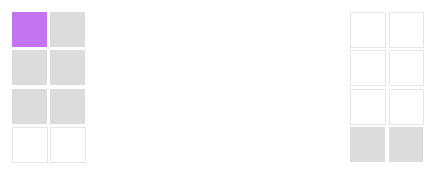

In [64]:
def get_legcoordinates(leg_array, boxsize = 100, stepregion = 0.9):
    
    box_xs = boxsize * np.arange(0, np.shape(leg_array)[1])
    box_ys = np.flip(boxsize * np.arange(0, np.shape(leg_array)[0]))
    
    box_buffer =  int ( ( boxsize - (boxsize * stepregion) ) / 2  )
    stepbox_size = int(stepregion * boxsize)
    
    stepbox_xs = box_xs + box_buffer
    stepbox_ys = box_ys + box_buffer
    
    # make dictionary of leg => coordinates
    leg_coordinates = {}
    for y in np.arange(np.shape(leg_array)[0]):
        for x in np.arange(np.shape(leg_array)[1]):
            leg = leg_array[y,x]
            xcoord = stepbox_xs[x]
            ycoord = stepbox_ys[y]
            leg_coordinates[leg] = np.array([xcoord, ycoord])
    return leg_coordinates, stepbox_size

def icpdemo(a,swinging):

    boxsize = 100
    stepregion = 0.9
    down_color = 'gainsboro'
    num_legs = 8
    legs = np.array(gaitFunctions.get_leg_list(num_legs))
    leg_array = legs.reshape(int(num_legs/2),2)

    if '4' in swinging:
        leg_set = 'rear'
        legs_in_plot = ['L4','R4']
    else:
        leg_set = 'lateral'
        legs_in_plot = ['L1','L2','L3','R1','R2','R3']
        
    combos, combo_colors = gaitFunctions.get_gait_combo_colors(leg_set)
    legs_to_show = gaitFunctions.get_leg_combos()[0][leg_set]

    leg_coordinates, stepbox_size = get_legcoordinates(leg_array, boxsize, stepregion)
    combo = gaitFunctions.get_swing_categories(swinging, leg_set)
    
    up_color = combo_colors[combo]
    swinging_legs = swinging.split('_')
    
    for leg in legs:
        x,y = leg_coordinates[leg]
    #     print(x,y) # testing
        if leg in swinging_legs:
            # plot a SWING box for this leg
            # rect_color = up_color        
            rect_color = up_color
            rect = patches.Rectangle((x, y), stepbox_size, stepbox_size, facecolor=rect_color)
    #         print('plotting a swing') # testing
        elif leg in legs_in_plot:
            # plot a STANCE box for this leg
    #         print('plotting a stance') # testing
            rect_color = down_color 
            rect = patches.Rectangle((x, y), stepbox_size, stepbox_size, facecolor=rect_color)
        else:
            # plot an EMPTY box for this leg
            rect = patches.Rectangle((x, y), stepbox_size, stepbox_size, 
                                     facecolor='w', edgecolor='gainsboro', linewidth=0.5)

        a.add_patch(rect)
    
    a.set_xticks([])
    a.set_yticks([])
    edges = ['top','right','bottom','left']
    for edge in edges:
        a.spines[edge].set_visible(False)

    a.set_xlim([0,2*boxsize])
    a.set_ylim([0,num_legs/2*boxsize])
    a.set_aspect('equal')
    return a

f, [a1,a2] = plt.subplots(1,2,figsize=[8,2])
swinging = 'L1'
a1 = icpdemo(a1,swinging)
swinging = '4'
a2 = icpdemo(a2,swinging)
plt.show()

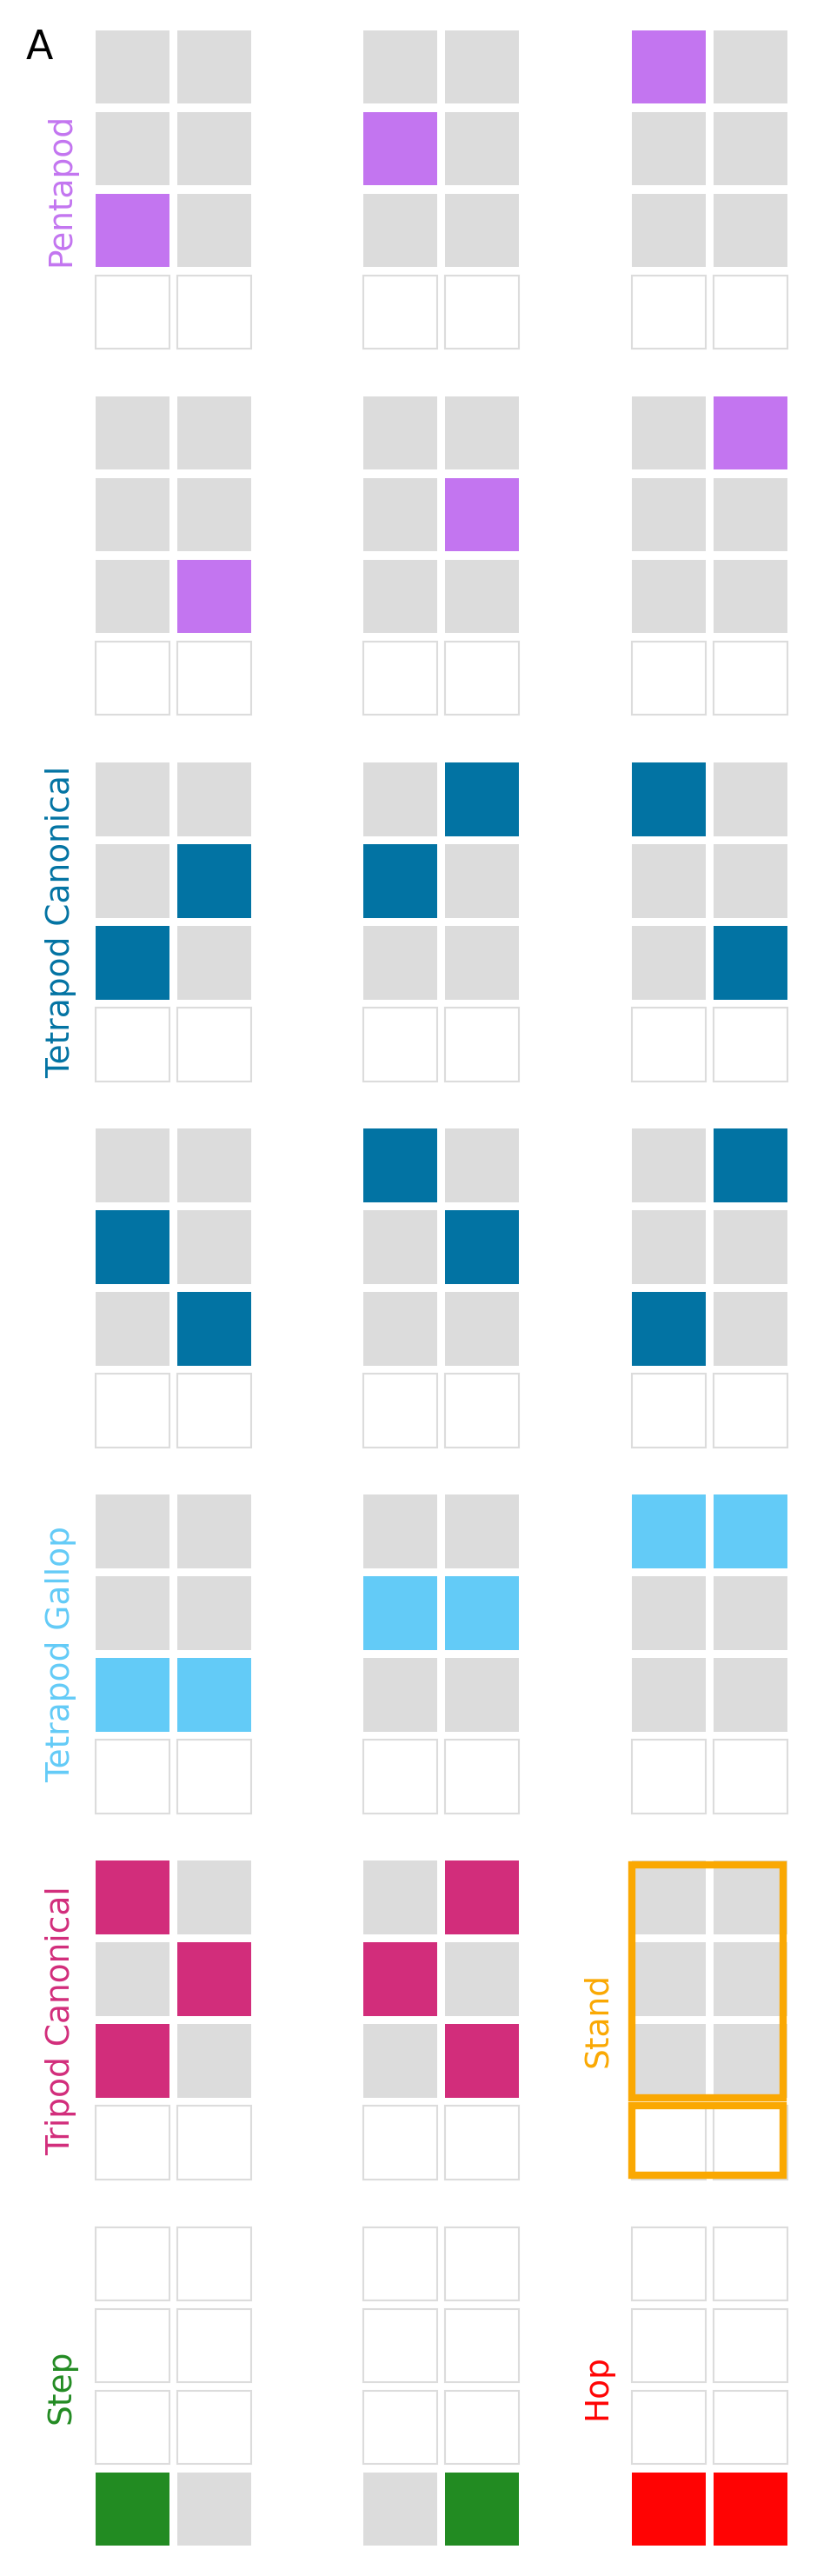

In [69]:
f, axes = plt.subplots(7,3,figsize=(3.4,10) ,dpi=300)
combos, combo_colors = gaitFunctions.get_gait_combo_colors('lateral')
rear_combos, rear_combo_colors = gaitFunctions.get_gait_combo_colors('rear')

pentapod_axes_1 = axes[0,:]
pentapod_swinging = ['L3','L2','L1']
for i, ax in enumerate(pentapod_axes_1):
    ax = icpdemo(ax,pentapod_swinging[i])
axes[0,0].annotate('A', xy=(-0.4, 0.9), xycoords='axes fraction', fontsize=axis_fontsize)
axes[0,0].set_ylabel('Pentapod',fontsize=tick_fontsize, color = combo_colors['pentapod'])

pentapod_axes_2 = axes[1,:]
pentapod_swinging = ['R3','R2','R1']
for i, ax in enumerate(pentapod_axes_2):
    ax = icpdemo(ax,pentapod_swinging[i])
    
tetrapod_can_axes_1 = axes[2,:]
tetrapod_can_swinging = ['L3_R2','L2_R1','L1_R3']
for i, ax in enumerate(tetrapod_can_axes_1):
    ax = icpdemo(ax,tetrapod_can_swinging[i])
axes[2,0].set_ylabel('Tetrapod Canonical',fontsize=tick_fontsize, color = combo_colors['tetrapod_canonical'])
    
tetrapod_can_axes_2 = axes[3,:]
tetrapod_can_swinging = ['L2_R3','L1_R2','L3_R1']
for i, ax in enumerate(tetrapod_can_axes_2):
    ax = icpdemo(ax,tetrapod_can_swinging[i])
    
tetrapod_gal_axes = axes[4,:]
tetrapod_gal_swinging = ['L3_R3','L2_R2','L1_R1']
for i, ax in enumerate(tetrapod_gal_axes):
    ax = icpdemo(ax,tetrapod_gal_swinging[i])
axes[4,0].set_ylabel('Tetrapod Gallop',fontsize=tick_fontsize, color = combo_colors['tetrapod_gallop'])

tripod_axes = axes[5,:2]
tripod_swinging = ['L1_L3_R2','L2_R1_R3']
for i, ax in enumerate(tripod_axes):
    ax = icpdemo(ax,tripod_swinging[i])
axes[5,0].set_ylabel('Tripod Canonical',fontsize=tick_fontsize, color = combo_colors['tripod_canonical'])

hexapod_stand = axes[5,2]
hexapod_stand = icpdemo(hexapod_stand, '3')
combos, combo_colors = gaitFunctions.get_gait_combo_colors('lateral')
rect_hexapod = patches.Rectangle((5, 105), 100*2 - 15, 100*3 - 15 , facecolor='none', 
                         edgecolor = combo_colors['stand'], linewidth=2)
rect_rear = patches.Rectangle((5, 10), 100*2 - 15, 100*1 - 15, facecolor='none', 
                         edgecolor = combo_colors['stand'], linewidth=2)
hexapod_stand.add_patch(rect_hexapod)
hexapod_stand.add_patch(rect_rear)
axes[5,2].set_ylabel('Stand',fontsize=tick_fontsize, color = combo_colors['stand'])
    
rear_axes = axes[6,:]
rear_swinging = ['L4','R4','L4_R4'] # ,'']
for i, ax in enumerate(rear_axes):
    ax = icpdemo(ax,rear_swinging[i])
axes[6,0].set_ylabel('Step',fontsize=tick_fontsize, color = rear_combo_colors['step'])
axes[6,2].set_ylabel('Hop',fontsize=tick_fontsize, color = rear_combo_colors['hop'])

plt.tight_layout()
plt.show()